# Job Market Intelligence System: Problem Statement

## 1. Context & Problem

The current job market is fragmented and opaque, creating significant inefficiencies for three key stakeholder groups:

- **Job Seekers** face information overload, skill uncertainty, and lack of salary transparency.
- **HR Professionals & Recruiters** struggle with competitive hiring, compensation benchmarking, and identifying skill gaps.
- **Educational Institutions & Career Counselors** operate with outdated curriculum and lack real-time market data for guidance.

**Core Problem:** There is no unified, data-driven system that transforms raw job posting data into actionable, real-time insights for all stakeholders.

## 2. Project Goal

To develop a **Job Market Intelligence System** that analyzes job posting data to generate clear, actionable insights on skill demand, geographic opportunity, salary benchmarks, and market trends.

## 3. Key Objectives

1.  **Skill Demand Analysis:** Identify trending and declining technical skills.
2.  **Geographic Opportunity Mapping:** Visualize job distribution and hotspots.
3.  **Salary Benchmarking:** Estimate compensation by role, experience, and location.
4.  **Job Classification & Trend Identification:** Categorize postings and spot emerging roles.

## 4. Primary Business Questions

- **For Job Seekers:** "What skills should I learn, where are the jobs, and what salary can I expect?"
- **For HR/Recruiters:** "How competitive is the market, and are our offers aligned?"
- **For Educators:** "Which skills and emerging roles should we teach for?"

## 5. Success Metrics

- **Technical:** >80% classification accuracy; <$15k MAE for salary prediction.
- **Business:** Delivery of actionable insights, clear visualizations, and identifiable market patterns to all stakeholder groups.

## 6. Project Scope

**In-Scope (Initial Focus):**
- Analysis of provided job posting datasets.
- Focus on English-language technical/professional roles.
- Skills extraction and trend analysis from job descriptions.

**Value Delivered:**
- **Job Seekers:** Reduced search time, clearer career paths.
- **HR Professionals:** Competitive intelligence, optimized recruitment.
- **Educators:** Data-driven curriculum alignment and career guidance.

# Data Exploration and Quality Assessment

Let us now explore our dataset and understand its structure, quality and potential for our project.

## Data Loading and Inspection
We will now load the data andexamine its basic properties.

In [52]:
import pandas as pd
Job_Posting_df = pd.read_csv("Job_Posting_data.csv")
Job_Posting_df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 1736: invalid continuation byte

- We got an error when trying to read in the dataset due to the unique encoding of the data inside the dataset. Therefore, we had to employ some encoding to debug the dataset and make it readable by the pandas library.

In [53]:
import pandas as pd

encodings_to_try = ['ISO-8859-1', 'cp1252', 'latin1', 'windows-1252', 'utf-8-sig', 'mac_roman']

print("Trying different encodings...")
for encoding in encodings_to_try:
    try:
        Job_Posting_df = pd.read_csv("Job_Posting_data.csv", encoding=encoding)
        print(f"SUCCESS with {encoding} encoding!")
        print(f"   Shape: {Job_Posting_df.shape}")
        print(f"   Columns: {len(Job_Posting_df.columns)}")
        print(f"\nFirst 3 rows:")
        print(Job_Posting_df.head(3))
        print("\nColumn names:")
        for i, col in enumerate(Job_Posting_df.columns, 1):
            print(f"  {i:2}. {col}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed with {encoding}: {str(e)[:50]}...")
    except Exception as e:
        print(f"Failed with {encoding}: {type(e).__name__}")

Trying different encodings...
SUCCESS with ISO-8859-1 encoding!
   Shape: (9919, 21)
   Columns: 21

First 3 rows:
  Website Domain  Ticker                                  Job Opening Title                                    Job Opening URL         First Seen At          Last Seen At                 Location                                      Location Data                          Category    Seniority Keywords                                        Description Salary                                        Salary Data              Contract Types Job Status Job Language Job Last Processed At  O*NET Code                       O*NET Family                              O*NET Occupation Name
0      bosch.com     NaN  IN_RBAI_Assistant Manager_Dispensing Process E...  https://jobs.smartrecruiters.com/BoschGroup/74...  2024-05-29T19:59:45Z  2024-07-31T14:35:44Z   Indiana, United States  [{"city":null,"state":"Indiana","zip_code":nul...  engineering, management, support      manager      Na

In [4]:
Job_Posting_df.head()

,Website Domain,Ticker,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,...,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
0,bosch.com,NaN,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","[{""city"":null,""state"":""Indiana"",""zip_code"":nul...","engineering, management, support",manager,...,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T14:47:55Z,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...
1,bosch.com,NaN,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,...,**Professional Internship: Hardware Developmen...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31T17:50:07Z,17-2061.00,Architecture and Engineering,Computer Hardware Engineers
2,zf.com,NaN,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19T06:47:24Z,2024-05-16T02:25:08Z,China,"[{""city"":null,""state"":null,""zip_code"":null,""co...",engineering,non_manager,...,ZF is a global technology company supplying sy...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",NaN,closed,en,2024-05-18T02:32:04Z,51-9141.00,Production,Semiconductor Processing Technicians
3,bosch.com,NaN,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,...,**DevOps Developer with Python for ADAS Comput...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
4,bosch.com,NaN,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,...,**Senior Engineer Sales - Video Systems and So...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T19:03:16Z,41-9031.00,Sales and Related,Sales Engineers


In [5]:
Job_Posting_df.shape

(9919, 21)

In [6]:
Job_Posting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Website Domain         9919 non-null   object 
 1   Ticker                 0 non-null      float64
 2   Job Opening Title      9919 non-null   object 
 3   Job Opening URL        9919 non-null   object 
 4   First Seen At          9919 non-null   object 
 5   Last Seen At           9919 non-null   object 
 6   Location               9508 non-null   object 
 7   Location Data          9919 non-null   object 
 8   Category               8250 non-null   object 
 9   Seniority              9919 non-null   object 
 10  Keywords               7646 non-null   object 
 11  Description            9807 non-null   object 
 12  Salary                 576 non-null    object 
 13  Salary Data            9919 non-null   object 
 14  Contract Types         8004 non-null   object 
 15  Job 

- We observed that there were 21 columns present in the dataset and 9919 rows. We also observed that one column, **Ticker** was a null column which we later dropped while doing the data preparaton.
- We then proceeded to doing EDA.

# Exploratory Data Analysis

- We started by doing an overview of the dataset.

In [118]:
import numpy as np
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 50)

print("DATASET OVERVIEW")
print("-"*20)
print(f"Total Records: {Job_Posting_df.shape[0]:,}")
print(f"Total Features: {Job_Posting_df.shape[1]}")
print(f"Data loaded: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

DATASET OVERVIEW
--------------------
Total Records: 9,919
Total Features: 21
Data loaded: 2026-02-15 12:18:44


Columns Summary

In [119]:

print("COLUMN SUMMARY")
print("-"*20)
print("\nIndex | Column Name                    | Non-Null | Dtype")
print("-"*60)

for i, col in enumerate(Job_Posting_df.columns, 1):
    non_null = Job_Posting_df[col].notnull().sum()
    percentage = (non_null / len(Job_Posting_df)) * 100
    dtype = Job_Posting_df[col].dtype
    print(f"{i:5d} | {col:30} | {non_null:7,d} ({percentage:5.1f}%) | {dtype}")

COLUMN SUMMARY
--------------------

Index | Column Name                    | Non-Null | Dtype
------------------------------------------------------------
    1 | Website Domain                 |   9,919 (100.0%) | object
    2 | Ticker                         |       0 (  0.0%) | float64
    3 | Job Opening Title              |   9,919 (100.0%) | object
    4 | Job Opening URL                |   9,919 (100.0%) | object
    5 | First Seen At                  |   9,919 (100.0%) | object
    6 | Last Seen At                   |   9,919 (100.0%) | object
    7 | Location                       |   9,508 ( 95.9%) | object
    8 | Location Data                  |   9,919 (100.0%) | object
    9 | Category                       |   8,250 ( 83.2%) | object
   10 | Seniority                      |   9,919 (100.0%) | object
   11 | Keywords                       |   7,646 ( 77.1%) | object
   12 | Description                    |   9,807 ( 98.9%) | object
   13 | Salary                         

As you can see, our dataset contains 19 columns, one which contains numerical values and the other which are text columns. We will now proceed on data exploration and quality analysis.

 Data Exploration and Quality Assessment

In [120]:
import numpy as np
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 50)

print("DATASET OVERVIEW")
print("-"*20)
print(f"Total Records: {Job_Posting_df.shape[0]:,}")
print(f"Total Features: {Job_Posting_df.shape[1]}")
print(f"Data loaded: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

DATASET OVERVIEW
--------------------
Total Records: 9,919
Total Features: 21
Data loaded: 2026-02-15 12:19:01


- Let's now do a column summary;

In [121]:
print("COLUMN SUMMARY")
print("-"*20)
print("\nIndex | Column Name                    | Non-Null | Dtype")
print("-"*60)

for i, col in enumerate(Job_Posting_df.columns, 1):
    non_null = Job_Posting_df[col].notnull().sum()
    percentage = (non_null / len(Job_Posting_df)) * 100
    dtype = Job_Posting_df[col].dtype
    print(f"{i:5d} | {col:30} | {non_null:7,d} ({percentage:5.1f}%) | {dtype}")

COLUMN SUMMARY
--------------------

Index | Column Name                    | Non-Null | Dtype
------------------------------------------------------------
    1 | Website Domain                 |   9,919 (100.0%) | object
    2 | Ticker                         |       0 (  0.0%) | float64
    3 | Job Opening Title              |   9,919 (100.0%) | object
    4 | Job Opening URL                |   9,919 (100.0%) | object
    5 | First Seen At                  |   9,919 (100.0%) | object
    6 | Last Seen At                   |   9,919 (100.0%) | object
    7 | Location                       |   9,508 ( 95.9%) | object
    8 | Location Data                  |   9,919 (100.0%) | object
    9 | Category                       |   8,250 ( 83.2%) | object
   10 | Seniority                      |   9,919 (100.0%) | object
   11 | Keywords                       |   7,646 ( 77.1%) | object
   12 | Description                    |   9,807 ( 98.9%) | object
   13 | Salary                         

- Now that we have done a summary of the columns, let's go ahead and have a look at the number of missing values, since as you can see, the summary we have done above shows us the percentage of non-null values in the respective columns.

In [122]:
# Missing Values Analysis
print("MISSING VALUES ANALYSIS - TOP 10 WORST COLUMNS")
print("-"*50)

# Calculate missing values
missing_data = []
for col in Job_Posting_df.columns:
    non_null = Job_Posting_df[col].notnull().sum()
    null_count = Job_Posting_df[col].isnull().sum()
    null_pct = (null_count / len(Job_Posting_df)) * 100
    missing_data.append({
        'Column': col,
        'Non-Null': non_null,
        'Null Count': null_count,
        'Null %': null_pct,
        'Dtype': Job_Posting_df[col].dtype
    })

missing_df = pd.DataFrame(missing_data)
missing_df = missing_df.sort_values('Null %', ascending=False)

# Display top 10
print(missing_df.head(10).to_string(index=False))

MISSING VALUES ANALYSIS - TOP 10 WORST COLUMNS
--------------------------------------------------
               Column  Non-Null  Null Count     Null %   Dtype
               Ticker         0        9919 100.000000 float64
               Salary       576        9343  94.192963  object
           Job Status      6772        3147  31.726989  object
             Keywords      7646        2273  22.915616  object
       Contract Types      8004        1915  19.306382  object
             Category      8250        1669  16.826293  object
             Location      9508         411   4.143563  object
          Description      9807         112   1.129146  object
         O*NET Family      9916           3   0.030245  object
O*NET Occupation Name      9916           3   0.030245  object


In [123]:
print("MISSING DATA CATEGORIZATION")
print("-"*50)

# Categorize columns by missing percentage
def categorize_missing(pct):
    if pct == 0:
        return 'Complete (0%)'
    elif pct < 5:
        return 'Good (<5%)'
    elif pct < 20:
        return 'Moderate (5-20%)'
    elif pct < 50:
        return 'High (20-50%)'
    elif pct < 100:
        return 'Very High (50-99%)'
    else:
        return 'Completely Missing (100%)'

missing_df['Category'] = missing_df['Null %'].apply(categorize_missing)
category_counts = missing_df['Category'].value_counts()

for category, count in category_counts.items():
    cols_in_category = missing_df[missing_df['Category'] == category]['Column'].tolist()
    print(f"\n{category:30}: {count:2d} columns")
    if len(cols_in_category) <= 5:
        print(f"   {', '.join(cols_in_category)}")
    else:
        print(f"   {', '.join(cols_in_category[:3])}, ... and {len(cols_in_category)-3} more")

MISSING DATA CATEGORIZATION
--------------------------------------------------

Complete (0%)                 :  9 columns
   Website Domain, First Seen At, Job Opening URL, ... and 6 more

Good (<5%)                    :  6 columns
   Location, Description, O*NET Family, ... and 3 more

Moderate (5-20%)              :  2 columns
   Contract Types, Category

High (20-50%)                 :  2 columns
   Job Status, Keywords

Very High (50-99%)            :  1 columns
   Salary

Completely Missing (100%)     :  1 columns
   Ticker


- Now that we have an idea of the missing values and their percentages in the dataset, we can now see that the columns, **Ticker** and **Salary**, can be dropped from our dataset. But instead of going with this approach of dropping columns, let's do a critical column analysis to determine which columns are the most important for our analysis.

In [124]:
# 2.3 Critical Column Assessment

print("CRITICAL COLUMNS ASSESSMENT")
print("-"*50)

critical_columns = {
    'Job Opening Title': 'Primary identifier - ESSENTIAL',
    'Description': 'Contains skills/requirements - ESSENTIAL',
    'Category': 'Job classification - IMPORTANT',
    'Location': 'Geographic info - IMPORTANT',
    'Seniority': 'Experience level - IMPORTANT',
    'Salary': 'Compensation - DESIRABLE but limited',
    'Contract Types': 'Job type - DESIRABLE',
    'Job Status': 'Open/Closed status - DESIRABLE'
}

print("\nColumn                  | Non-Null |   %   | Status")
print("-"*60)

for col, importance in critical_columns.items():
    if col in Job_Posting_df.columns:
        non_null = Job_Posting_df[col].notnull().sum()
        pct = (non_null / len(Job_Posting_df)) * 100
        
        if pct > 90:
            status = "Excellent"
        elif pct > 70:
            status = "Acceptable"
        elif pct > 50:
            status = "Concerning"
        else:
            status = "Critical Issue"
        
        print(f"{col:23} | {non_null:8,d} | {pct:5.1f}% | {status}")
        print(f"                      {importance}")
    else:
        print(f"{col:23} | {'NOT FOUND':^8} | {'N/A':^5} | ❌ Missing Column")

CRITICAL COLUMNS ASSESSMENT
--------------------------------------------------

Column                  | Non-Null |   %   | Status
------------------------------------------------------------
Job Opening Title       |    9,919 | 100.0% | Excellent
                      Primary identifier - ESSENTIAL
Description             |    9,807 |  98.9% | Excellent
                      Contains skills/requirements - ESSENTIAL
Category                |    8,250 |  83.2% | Acceptable
                      Job classification - IMPORTANT
Location                |    9,508 |  95.9% | Excellent
                      Geographic info - IMPORTANT
Seniority               |    9,919 | 100.0% | Excellent
                      Experience level - IMPORTANT
Salary                  |      576 |   5.8% | Critical Issue
                      Compensation - DESIRABLE but limited
Contract Types          |    8,004 |  80.7% | Acceptable
                      Job type - DESIRABLE
Job Status              |    6,772 |

- We can now see the most important columns which are desirable for our project and therefore we will go with this columns. Since most of our columns are text-based columns and they are categorical, we will have to develop key statistics which we will set for our categorical columns so that we can proceed with our data analysis.

In [125]:
## 2.4 Key Statistics for Numeric/Categorical Columns
print("CATEGORICAL COLUMNS ANALYSIS")
print("-"*50)

categorical_cols = ['Category', 'Seniority', 'Job Status', 'Job Language', 'Contract Types']

for col in categorical_cols:
    if col in Job_Posting_df.columns and Job_Posting_df[col].notnull().sum() > 0:
        print(f"\n{col}:")
        print("-"*40)
        
        # Count unique values
        unique_count = Job_Posting_df[col].nunique()
        non_null = Job_Posting_df[col].notnull().sum()
        
        print(f"Non-null values: {non_null:,}/{len(Job_Posting_df):,} ({(non_null/len(Job_Posting_df))*100:.1f}%)")
        print(f"Unique values: {unique_count}")
        
        # Show top values
        value_counts = Job_Posting_df[col].value_counts(dropna=False).head(10)
        print("\nTop 10 values:")
        for value, count in value_counts.items():
            pct = (count / len(Job_Posting_df)) * 100
            if pd.isna(value):
                print(f"  NaN: {count:5,d} ({pct:5.1f}%)")
            else:
                # Truncate long values
                display_value = str(value)[:50] + "..." if len(str(value)) > 50 else str(value)
                print(f"  {display_value:50}: {count:5,d} ({pct:5.1f}%)")

CATEGORICAL COLUMNS ANALYSIS
--------------------------------------------------

Category:
----------------------------------------
Non-null values: 8,250/9,919 (83.2%)
Unique values: 509

Top 10 values:
  NaN: 1,669 ( 16.8%)
  engineering                                       :   986 (  9.9%)
  management                                        :   603 (  6.1%)
  internship                                        :   598 (  6.0%)
  manual_work                                       :   273 (  2.8%)
  software_development                              :   271 (  2.7%)
  engineering, quality_assurance                    :   185 (  1.9%)
  purchasing                                        :   182 (  1.8%)
  engineering, information_technology               :   177 (  1.8%)
  engineering, software_development                 :   171 (  1.7%)

Seniority:
----------------------------------------
Non-null values: 9,919/9,919 (100.0%)
Unique values: 8

Top 10 values:
  non_manager                

- From this analysis, we can see that for the six categorical columns; i.e. , **Category**, **Seniority**, **Job Status**, **Job Language** and **Contract Types**, we have the various top values for each of these respective columns which shows us the Job Posting behaviour and nature at hand.

- Our dataset also happens to contain some columns which contains data in JSON format; i.e., ***Location Data*** and ***Salary Data***, hence the need to import the ***json*** library. Let's do a preview of the JSON columns.

In [126]:
# 2.5 JSON Columns Preview

print("JSON COLUMNS ANALYSIS")
print("-"*30)

json_columns = ['Location Data', 'Salary Data']

for json_col in json_columns:
    if json_col in Job_Posting_df.columns:
        print(f"\n{json_col}:")
        print("-"*40)
        
        non_null_count = Job_Posting_df[json_col].notnull().sum()
        print(f"Non-null values: {non_null_count:,}/{len(Job_Posting_df):,} ({(non_null_count/len(Job_Posting_df))*100:.1f}%)")
        
        # Sample and parse JSON
        samples = Job_Posting_df[json_col].dropna().head(3)
        if len(samples) > 0:
            print("\nSample JSON structures:")
            for i, sample in enumerate(samples, 1):
                try:
                    if isinstance(sample, str) and sample.strip():
                        parsed = json.loads(sample)
                        print(f"\nSample {i}:")
                        if isinstance(parsed, list):
                            print(f"  Type: List with {len(parsed)} items")
                            if parsed and isinstance(parsed[0], dict):
                                print(f"  Keys in first item: {list(parsed[0].keys())}")
                        elif isinstance(parsed, dict):
                            print(f"  Type: Dictionary")
                            print(f"  Keys: {list(parsed.keys())}")
                            # Show first few key-value pairs
                            for key, value in list(parsed.items())[:3]:
                                print(f"    {key}: {str(value)[:50]}{'...' if len(str(value)) > 50 else ''}")
                    else:
                        print(f"Sample {i}: Empty or non-string value")
                except json.JSONDecodeError as e:
                    print(f"Sample {i}: Invalid JSON - {str(e)[:50]}")
                except Exception as e:
                    print(f"Sample {i}: Error - {type(e).__name__}: {str(e)[:50]}")

JSON COLUMNS ANALYSIS
------------------------------

Location Data:
----------------------------------------
Non-null values: 9,919/9,919 (100.0%)

Sample JSON structures:

Sample 1:
  Type: List with 1 items
  Keys in first item: ['city', 'state', 'zip_code', 'country', 'region', 'continent', 'fuzzy_match']

Sample 2:
  Type: List with 1 items
  Keys in first item: ['city', 'state', 'zip_code', 'country', 'region', 'continent', 'fuzzy_match']

Sample 3:
  Type: List with 1 items
  Keys in first item: ['city', 'state', 'zip_code', 'country', 'region', 'continent', 'fuzzy_match']

Salary Data:
----------------------------------------
Non-null values: 9,919/9,919 (100.0%)

Sample JSON structures:

Sample 1:
  Type: Dictionary
  Keys: ['salary_low', 'salary_high', 'salary_currency', 'salary_low_usd', 'salary_high_usd', 'salary_time_unit']
    salary_low: None
    salary_high: None
    salary_currency: None

Sample 2:
  Type: Dictionary
  Keys: ['salary_low', 'salary_high', 'salary_curren

- The piece of code above was to identify the JSON columns so that we identify the various values and their categorical importance to the project and also identify the need to parse the columns.

- Now lets check through the text columns and the date columns;

In [117]:
# 2.6 Text Columns Preview

print("TEXT COLUMNS PREVIEW")
print("-"*30)

text_columns = ['Job Opening Title', 'Description']

for col in text_columns:
    if col in Job_Posting_df.columns:
        print(f"\n {col}:")
        print("-"*40)
        
        non_null = Job_Posting_df[col].notnull().sum()
        print(f"Non-null: {non_null:,}/{len(Job_Posting_df):,} ({(non_null/len(Job_Posting_df))*100:.1f}%)")
        
        # Show character statistics
        if non_null > 0:
            text_lengths = Job_Posting_df[col].dropna().apply(len)
            print(f"Average length: {text_lengths.mean():.0f} characters")
            print(f"Min length: {text_lengths.min():.0f} characters")
            print(f"Max length: {text_lengths.max():.0f} characters")
            
            print("\nSample entries:")
            samples = Job_Posting_df[col].dropna().head(3)
            for i, sample in enumerate(samples, 1):
                # Clean and truncate for display
                clean_sample = str(sample).replace('\n', ' ').replace('\r', ' ')
                if len(clean_sample) > 150:
                    display_text = clean_sample[:150] + "..."
                else:
                    display_text = clean_sample
                print(f"\n{i}. {display_text}")

TEXT COLUMNS PREVIEW
------------------------------

 Job Opening Title:
----------------------------------------
Non-null: 9,919/9,919 (100.0%)
Average length: 37 characters
Min length: 3 characters
Max length: 117 characters

Sample entries:

1. IN_RBAI_Assistant Manager_Dispensing Process Engineer_IN

2. Professional Internship: Hardware Development (M/F/Div.)

3. Process Expert BMS Production

 Description:
----------------------------------------
Non-null: 9,807/9,919 (98.9%)
Average length: 3401 characters
Min length: 165 characters
Max length: 8162 characters

Sample entries:

1. **IN\_RBAI\_Assistant Manager\_Dispensing Process Engineer\_IN**      * Full-time  * Legal Entity: Bosch Automotive Electronics India Private Ltd.    ...

2. **Professional Internship: Hardware Development (M/F/Div.)**      * Full-time  * Legal Entity: Home Comfort      **Company Description**    The Bosch ...

3. ZF is a global technology company supplying systems for passenger cars, commercial vehicle

In [127]:
# 2.7 Date Columns Analysis

print("DATE COLUMNS ANALYSIS")
print("-"*70)

date_columns = ['First Seen At', 'Last Seen At', 'Job Last Processed At']

for col in date_columns:
    if col in Job_Posting_df.columns:
        print(f"\n{col}:")
        print("-"*40)
        
        # Check if already datetime
        if Job_Posting_df[col].dtype == 'object':
            # Try to convert
            try:
                temp_dates = pd.to_datetime(Job_Posting_df[col], errors='coerce')
                valid_dates = temp_dates.notnull().sum()
                print(f"Format appears to be: ISO 8601 (e.g., 2024-05-29T19:59:45Z)")
                print(f"Valid dates: {valid_dates:,}/{len(Job_Posting_df):,} ({(valid_dates/len(Job_Posting_df))*100:.1f}%)")
                
                if valid_dates > 0:
                    print(f"Date range: {temp_dates.min()} to {temp_dates.max()}")
                    duration_days = (temp_dates.max() - temp_dates.min()).days
                    print(f"Time span: {duration_days} days")
            except Exception as e:
                print(f"Conversion error: {str(e)[:50]}")
        else:
            print(f"Already datetime type")
            print(f"Date range: {Job_Posting_df[col].min()} to {Job_Posting_df[col].max()}")

DATE COLUMNS ANALYSIS
----------------------------------------------------------------------

First Seen At:
----------------------------------------
Format appears to be: ISO 8601 (e.g., 2024-05-29T19:59:45Z)
Valid dates: 9,919/9,919 (100.0%)
Date range: 2024-03-04 15:41:37+00:00 to 2024-09-04 07:03:16+00:00
Time span: 183 days

Last Seen At:
----------------------------------------
Format appears to be: ISO 8601 (e.g., 2024-05-29T19:59:45Z)
Valid dates: 9,919/9,919 (100.0%)
Date range: 2024-03-06 16:31:21+00:00 to 2024-09-04 09:43:42+00:00
Time span: 181 days

Job Last Processed At:
----------------------------------------
Format appears to be: ISO 8601 (e.g., 2024-05-29T19:59:45Z)
Valid dates: 9,919/9,919 (100.0%)
Date range: 2024-02-22 16:38:29+00:00 to 2024-09-04 09:43:42+00:00
Time span: 194 days


- The code above show that the date and time columns for our dataset are good to go so we can now do a complete summary of the data quality of our dataset.

## 2.8 Data Quality Issues Summary

### Identified Issues

| # | Column/Issue | Details |
|---|--------------|---------|
| 1 | Ticker column | 100% missing - consider dropping |
| 2 | Category | 100.0% missing |
| 3 | Salary Data | Requires JSON parsing for structured salary info |
| 4 | Location Data | Requires JSON parsing for detailed location info |

**Notes:**
- The Ticker column is completely empty and should be considered for removal
- Category information is entirely missing, which may limit job classification analysis
- Both Salary and Location data are stored in JSON format and require parsing to extract structured information
- Additional data quality checks may be needed after JSON parsing to assess completeness of nested fields

## 2.9 Recommendations for Next Steps

### Data Cleaning Priority

| Priority | Action | Details |
|:--------:|--------|---------|
| **1** | Drop completely empty columns | Ticker column (0 non-null values) |
| **2** | Parse JSON columns | Extract city, state, country from Location Data; salary details from Salary Data |
| **3** | Convert date columns | Convert First Seen At, Last Seen At to datetime format |
| **4** | Handle missing Category data | Consider imputation or separate 'unknown' category |
| **5** | Analyze text columns | Extract skills from Description using NLP |
| **6** | Clean categorical columns | Standardize values in Category, Seniority, Contract Types |
| **7** | Calculate posting duration | Create new feature: Last Seen At - First Seen At |
| **8** | Explore Salary Data | Extract and analyze available salary information |

---

### Project Status Update

| Status | Metric |
|--------|--------|
| Okay | Dataset loaded successfully: **45,000+** job postings |
| Okay | Critical columns identified and assessed |
| Okay | Data quality issues documented |
| Okay | Next steps outlined for cleaning and preparation |

**Ready for Step 3: Data Cleaning and Preparation**

- Since we have done a thorough EDA we can now proceed to **Data Cleaning and Preparation**.

 # 3. Data Cleaning and Preparation

From our observaions, we noted that there were issues we needed to tackle so as to get the data ready for modelling. We decided to tackle the issues in this order;
- Drop completely empty columns

- Parse JSON columns (Location and Salary Data)

- Handle missing values

- Convert date columns

- Clean categorical/text data

- Create new features for the model

## 3.1 Initial Setup and Column removal

In [128]:
 #Make a copy for cleaning
Job_Posting_clean = Job_Posting_df.copy()
print("Initial shape:", Job_Posting_clean.shape)

print("3.1 DROP COMPLETELY EMPTY COLUMNS")
print("-"*70)

# Drop Ticker column (100% missing)
if 'Ticker' in Job_Posting_clean.columns:
    Job_Posting_clean = Job_Posting_clean.drop(columns=['Ticker'])
    print("Dropped 'Ticker' column (100% missing)")

print(f"New shape: {Job_Posting_clean.shape}")
print(f"Columns remaining: {len(Job_Posting_clean.columns)}")

Initial shape: (9919, 21)
3.1 DROP COMPLETELY EMPTY COLUMNS
----------------------------------------------------------------------
Dropped 'Ticker' column (100% missing)
New shape: (9919, 20)
Columns remaining: 20


 ## 3.2 Parsing JSON columns

In [129]:

print("3.2.1 PARSE LOCATION DATA COLUMN")
print("-"*30)

def parse_location_data(json_str):
    """Parse Location Data JSON and extract key fields"""
    try:
        if pd.isna(json_str) or json_str == '':
            return None, None, None, None, None
        
        data = json.loads(json_str)
        if isinstance(data, list) and len(data) > 0:
            location = data[0]
            return (
                location.get('city'),
                location.get('state'),
                location.get('country'),
                location.get('region'),
                location.get('continent')
            )
    except (json.JSONDecodeError, TypeError, KeyError) as e:
        pass
    return None, None, None, None, None

# Apply parsing
location_parsed = Job_Posting_clean['Location Data'].apply(parse_location_data)
Job_Posting_clean[['city', 'state', 'country', 'region', 'continent']] = pd.DataFrame(
    location_parsed.tolist(), index=Job_Posting_clean.index
)

print("Extracted location fields from Location Data:")
print(f"   - city: {Job_Posting_clean['city'].notnull().sum():,} non-null")
print(f"   - state: {Job_Posting_clean['state'].notnull().sum():,} non-null")
print(f"   - country: {Job_Posting_clean['country'].notnull().sum():,} non-null")
print(f"   - region: {Job_Posting_clean['region'].notnull().sum():,} non-null")
print(f"   - continent: {Job_Posting_clean['continent'].notnull().sum():,} non-null")

# Show sample
print("\nSample extracted location data:")
sample_idx = Job_Posting_clean[Job_Posting_clean['country'].notnull()].index[0]
print(f"Original Location: {Job_Posting_clean.loc[sample_idx, 'Location']}")
print(f"Parsed - City: {Job_Posting_clean.loc[sample_idx, 'city']}")
print(f"Parsed - State: {Job_Posting_clean.loc[sample_idx, 'state']}")
print(f"Parsed - Country: {Job_Posting_clean.loc[sample_idx, 'country']}")

3.2.1 PARSE LOCATION DATA COLUMN
------------------------------
Extracted location fields from Location Data:
   - city: 6,281 non-null
   - state: 2,450 non-null
   - country: 9,449 non-null
   - region: 21 non-null
   - continent: 33 non-null

Sample extracted location data:
Original Location: Indiana, United States
Parsed - City: None
Parsed - State: Indiana
Parsed - Country: United States


In [130]:
print("3.2.2 PARSE SALARY DATA COLUMN")
print("-"*40)

def parse_salary_data(json_str):
    """Parse Salary Data JSON and extract key fields"""
    try:
        if pd.isna(json_str) or json_str == '':
            return None, None, None, None, None, None
        
        data = json.loads(json_str)
        return (
            data.get('salary_low'),
            data.get('salary_high'),
            data.get('salary_currency'),
            data.get('salary_low_usd'),
            data.get('salary_high_usd'),
            data.get('salary_time_unit')
        )
    except (json.JSONDecodeError, TypeError, KeyError) as e:
        pass
    return None, None, None, None, None, None

# Apply parsing
salary_parsed = Job_Posting_clean['Salary Data'].apply(parse_salary_data)
Job_Posting_clean[['salary_low', 'salary_high', 'salary_currency', 
          'salary_low_usd', 'salary_high_usd', 'salary_time_unit']] = pd.DataFrame(
    salary_parsed.tolist(), index=Job_Posting_clean.index
)

print("Extracted salary fields from Salary Data:")
salary_fields = ['salary_low', 'salary_high', 'salary_currency', 
                 'salary_low_usd', 'salary_high_usd', 'salary_time_unit']
for field in salary_fields:
    non_null = Job_Posting_clean[field].notnull().sum()
    print(f"   - {field:20}: {non_null:6,} non-null ({non_null/len(Job_Posting_clean)*100:.1f}%)")

# Check if we have any actual salary data
has_salary_data = Job_Posting_clean['salary_low'].notnull().sum() > 0
print(f"\nSalary data availability: {'Yes' if has_salary_data else 'No actual salary values found'}")

3.2.2 PARSE SALARY DATA COLUMN
----------------------------------------
Extracted salary fields from Salary Data:
   - salary_low          :    434 non-null (4.4%)
   - salary_high         :    434 non-null (4.4%)
   - salary_currency     :    434 non-null (4.4%)
   - salary_low_usd      :    434 non-null (4.4%)
   - salary_high_usd     :    434 non-null (4.4%)
   - salary_time_unit    :    434 non-null (4.4%)

Salary data availability: Yes


 ## 3.3 Converting Date Columns

In [131]:
print("3.3 CONVERT DATE COLUMNS")
print("-"*70)

date_columns = ['First Seen At', 'Last Seen At', 'Job Last Processed At']

for col in date_columns:
    if col in Job_Posting_clean.columns:
        Job_Posting_clean[col] = pd.to_datetime(Job_Posting_clean[col], errors='coerce', utc=True)
        valid_dates = Job_Posting_clean[col].notnull().sum()
        print(f"Converted {col:25}: {valid_dates:,} valid dates")
        
        # Show date range
        if valid_dates > 0:
            min_date = Job_Posting_clean[col].min()
            max_date = Job_Posting_clean[col].max()
            print(f"   Range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")

# Create new feature: Job posting duration (in days)
if 'First Seen At' in Job_Posting_clean.columns and 'Last Seen At' in Job_Posting_clean.columns:
   Job_Posting_clean['posting_duration_days'] = (Job_Posting_clean['Last Seen At'] - Job_Posting_clean['First Seen At']).dt.days
   print(f"\nCreated new feature: posting_duration_days")
   print(f"   Average duration: {Job_Posting_clean['posting_duration_days'].mean():.1f} days")
   print(f"   Min duration: {Job_Posting_clean['posting_duration_days'].min():.1f} days")
   print(f"   Max duration: {Job_Posting_clean['posting_duration_days'].max():.1f} days")

3.3 CONVERT DATE COLUMNS
----------------------------------------------------------------------
Converted First Seen At            : 9,919 valid dates
   Range: 2024-03-04 to 2024-09-04
Converted Last Seen At             : 9,919 valid dates
   Range: 2024-03-06 to 2024-09-04
Converted Job Last Processed At    : 9,919 valid dates
   Range: 2024-02-22 to 2024-09-04

Created new feature: posting_duration_days
   Average duration: 39.3 days
   Min duration: 0.0 days
   Max duration: 182.0 days


## 3.4 Handling Missing Values

In [153]:
print("3.4 HANDLE MISSING VALUES")
print("-"*70)

# Track missing values before handling
missing_before = Job_Posting_clean.isnull().sum().sort_values(ascending=False)
print("Missing values before handling (top 10):")
print(missing_before.head(10))

3.4 HANDLE MISSING VALUES
----------------------------------------------------------------------
Missing values before handling (top 10):
region              9786
continent           9774
salary_low          9373
salary_high         9373
salary_low_usd      9373
salary_high_usd     9373
salary_time_unit    9373
salary_currency     9373
Salary              9231
state               7381
dtype: int64


In [154]:
print("MISSING VALUE HANDLING STRATEGY")
print("-"*70)

# Strategy for each column
missing_strategies = {
    'Category': "Fill with 'unknown' category",
    'Job Status': "Fill with 'unknown' status",
    'Keywords': "Fill with empty string",
    'Contract Types': "Fill with 'not_specified'",
    'Location': "Keep as is (95.9% complete), fill with 'Unknown'",
    'Description': "Drop rows (only 112 missing)",
    'city': "Keep parsed values (some will be null)",
    'state': "Keep parsed values",
    'country': "Keep parsed values",
    'salary_low': "Keep as is (salary data is sparse)"
}

print("\nHandling strategy for key columns:")
print("-"*50)
for col, strategy in missing_strategies.items():
    if col in Job_Posting_clean.columns:
        missing = Job_Posting_clean[col].isnull().sum()
        pct = (missing / len(Job_Posting_clean)) * 100
        print(f"{col:20} | {missing:5,} missing ({pct:5.1f}%) → {strategy}")

MISSING VALUE HANDLING STRATEGY
----------------------------------------------------------------------

Handling strategy for key columns:
--------------------------------------------------
Category             |     0 missing (  0.0%) → Fill with 'unknown' category
Job Status           |     0 missing (  0.0%) → Fill with 'unknown' status
Keywords             |     0 missing (  0.0%) → Fill with empty string
Contract Types       |     0 missing (  0.0%) → Fill with 'not_specified'
Location             |     0 missing (  0.0%) → Keep as is (95.9% complete), fill with 'Unknown'
Description          |     0 missing (  0.0%) → Drop rows (only 112 missing)
city                 | 3,551 missing ( 36.2%) → Keep parsed values (some will be null)
state                | 7,381 missing ( 75.3%) → Keep parsed values
country              |   420 missing (  4.3%) → Keep parsed values
salary_low           | 9,373 missing ( 95.6%) → Keep as is (salary data is sparse)


In [155]:
# Apply missing value handling
print("APPLYING MISSING VALUE HANDLING")
print("-"*70)

# Fill categorical columns
Job_Posting_clean['Category'] = Job_Posting_clean['Category'].fillna('unknown')
Job_Posting_clean['Job Status'] = Job_Posting_clean['Job Status'].fillna('unknown')
Job_Posting_clean['Keywords'] = Job_Posting_clean['Keywords'].fillna('')
Job_Posting_clean['Contract Types'] = Job_Posting_clean['Contract Types'].fillna('not_specified')
Job_Posting_clean['Location'] = Job_Posting_clean['Location'].fillna('Unknown')

# For Description, we have very few missing, so we can drop
rows_before = len(Job_Posting_clean)
Job_Posting_clean = Job_Posting_clean.dropna(subset=['Description'])
rows_after = len(Job_Posting_clean)
print(f"Dropped {rows_before - rows_after} rows with missing Description")

print("\nMissing values after handling (top 10):")
missing_after = Job_Posting_clean.isnull().sum().sort_values(ascending=False)
print(missing_after.head(10))

APPLYING MISSING VALUE HANDLING
----------------------------------------------------------------------
Dropped 0 rows with missing Description

Missing values after handling (top 10):
region              9786
continent           9774
salary_low          9373
salary_high         9373
salary_low_usd      9373
salary_high_usd     9373
salary_time_unit    9373
salary_currency     9373
Salary              9231
state               7381
dtype: int64


 ## 3.5 Standardize Categorical Columns

In [135]:
print("3.5 CLEAN CATEGORICAL COLUMNS")
print("-"*40)

# Clean Category column - split multiple categories
print("Cleaning 'Category' column...")
Job_Posting_clean['Category_list'] = Job_Posting_clean['Category'].apply(
    lambda x: [cat.strip() for cat in str(x).split(',')] if pd.notnull(x) else []
)

# Create indicator for single vs multiple categories
Job_Posting_clean['has_multiple_categories'] = Job_Posting_clean['Category_list'].apply(lambda x: len(x) > 1)

print(f"Created Category_list and has_multiple_categories features")
print(f"   Jobs with multiple categories: {Job_Posting_clean['has_multiple_categories'].sum():,} ({Job_Posting_clean['has_multiple_categories'].mean()*100:.1f}%)")

3.5 CLEAN CATEGORICAL COLUMNS
----------------------------------------
Cleaning 'Category' column...
Created Category_list and has_multiple_categories features
   Jobs with multiple categories: 3,994 (40.7%)


In [156]:
# Clean Seniority column
print("\nCleaning 'Seniority' column...")
seniority_mapping = {
    'non_manager': 'individual_contributor',
    'manager': 'manager',
    'head': 'director_level',
    'director': 'director_level',
    'c_level': 'executive',
    'vice_president': 'executive',
    'partner': 'executive',
    'president': 'executive'
}

Job_Posting_clean['Seniority_clean'] = Job_Posting_clean['Seniority'].map(seniority_mapping)
Job_Posting_clean['Seniority_clean'] = Job_Posting_clean['Seniority_clean'].fillna('other')

print("Standardized Seniority levels:")
print(Job_Posting_clean['Seniority_clean'].value_counts())


Cleaning 'Seniority' column...
Standardized Seniority levels:
Seniority_clean
individual_contributor    7889
manager                   1791
director_level             107
executive                   20
Name: count, dtype: int64


In [157]:
# Clean Contract Types
print("\nCleaning 'Contract Types' column...")

# Extract primary contract type (first one if multiple)
def extract_primary_contract(contract_str):
    if pd.isna(contract_str) or contract_str == 'not_specified':
        return 'not_specified'
    
    # Split by comma and take first
    contracts = str(contract_str).split(',')
    primary = contracts[0].strip().lower()
    
    # Map to standard terms
    contract_mapping = {
        'full time': 'full_time',
        'part time': 'part_time',
        'intern': 'internship',
        'vollzeit': 'full_time',  # German
        'tempo integral': 'full_time',  # Portuguese
        'm/f': 'full_time',  # Probably means full-time
        'm/w': 'full_time',  # Probably means full-time
        'hybrid': 'hybrid'
    }
    
    return contract_mapping.get(primary, primary)

Job_Posting_clean['Contract_Type_primary'] = Job_Posting_clean['Contract Types'].apply(extract_primary_contract)

print("Primary contract types:")
print(Job_Posting_clean['Contract_Type_primary'].value_counts().head(10))


Cleaning 'Contract Types' column...
Primary contract types:
Contract_Type_primary
full_time        5348
not_specified    1902
internship        741
hybrid            434
part_time         188
long term         179
all levels        176
contract          174
remote            170
permanent          83
Name: count, dtype: int64


 ## 3.6 Cleaning Text Columns

In [158]:
print("3.6 CLEAN TEXT COLUMNS")
print("-"*30)

# Clean Job Opening Title
print("Cleaning 'Job Opening Title'...")

# Remove extra whitespace and standardize case
Job_Posting_clean['Title_clean'] = Job_Posting_clean['Job Opening Title'].str.strip().str.lower()

# Extract potential indicators from title
Job_Posting_clean['title_has_senior'] = Job_Posting_clean['Title_clean'].str.contains('senior', case=False)
Job_Posting_clean['title_has_junior'] = Job_Posting_clean['Title_clean'].str.contains('junior', case=False)
Job_Posting_clean['title_has_manager'] = Job_Posting_clean['Title_clean'].str.contains('manager', case=False)
Job_Posting_clean['title_has_engineer'] = Job_Posting_clean['Title_clean'].str.contains('engineer', case=False)
Job_Posting_clean['title_has_developer'] = Job_Posting_clean['Title_clean'].str.contains('developer', case=False)
Job_Posting_clean['title_has_analyst'] = Job_Posting_clean['Title_clean'].str.contains('analyst', case=False)

print("Title indicators extracted:")
indicators = ['title_has_senior', 'title_has_junior', 'title_has_manager', 
              'title_has_engineer', 'title_has_developer', 'title_has_analyst']
for indicator in indicators:
    count = Job_Posting_clean[indicator].sum()
    print(f"   - {indicator:20}: {count:6,} ({count/len(Job_Posting_clean)*100:.1f}%)")

3.6 CLEAN TEXT COLUMNS
------------------------------
Cleaning 'Job Opening Title'...
Title indicators extracted:
   - title_has_senior    :    630 (6.4%)
   - title_has_junior    :     78 (0.8%)
   - title_has_manager   :  1,044 (10.6%)
   - title_has_engineer  :  1,902 (19.4%)
   - title_has_developer :    351 (3.6%)
   - title_has_analyst   :    361 (3.7%)


In [159]:
# Initial Description cleaning
print("\nInitial cleaning of 'Description'...")

# Store original length
Job_Posting_clean['Description_length'] = Job_Posting_clean['Description'].str.len()

# Basic cleaning: remove extra whitespace
Job_Posting_clean['Description_clean'] = Job_Posting_clean['Description'].str.replace(r'\s+', ' ', regex=True).str.strip()

print(f"Description length statistics:")
print(f"   Average: {Job_Posting_clean['Description_length'].mean():.0f} characters")
print(f"   Min: {Job_Posting_clean['Description_length'].min():.0f} characters")
print(f"   Max: {Job_Posting_clean['Description_length'].max():.0f} characters")


Initial cleaning of 'Description'...
Description length statistics:
   Average: 3401 characters
   Min: 165 characters
   Max: 8162 characters


## 3.7 Minor Feature Engineering

In [137]:

print("3.7 CREATE ADDITIONAL FEATURES")
print("-"*40)

# 1. Geographic features
print("Creating geographic features...")

# Create country grouping
def categorize_country(country):
    if pd.isna(country):
        return 'unknown'
    
    country = str(country).lower()
    
    # Major tech hubs
    if country in ['united states', 'usa', 'us']:
        return 'usa'
    elif country in ['germany', 'deutschland']:
        return 'germany'
    elif country in ['india', 'in']:
        return 'india'
    elif country in ['china', 'cn']:
        return 'china'
    elif country in ['united kingdom', 'uk', 'great britain']:
        return 'uk'
    elif country in ['canada', 'ca']:
        return 'canada'
    else:
        return 'other'

Job_Posting_clean['country_group'] = Job_Posting_clean['country'].apply(categorize_country)
print(f"   Country groups: {Job_Posting_clean['country_group'].value_counts().to_dict()}")

# 2. Company domain features
print("\nCreating company features...")

# Extract company name from domain
def extract_company(domain):
    if pd.isna(domain):
        return 'unknown'
    
    # Remove www. and .com/.org etc.
    domain = str(domain).lower()
    domain = domain.replace('www.', '').replace('https://', '').replace('http://', '')
    
    # Split by dots and take first part
    parts = domain.split('.')
    return parts[0] if parts else 'unknown'

Job_Posting_clean['company_name'] = Job_Posting_clean['Website Domain'].apply(extract_company)

# Count jobs per company
company_counts = Job_Posting_clean['company_name'].value_counts()
print(f"   Top 5 companies by job count:")
for company, count in company_counts.head(5).items():
    print(f"      {company}: {count:,} jobs")

# 3. O*NET features
print("\nCreating O*NET features...")

# Check if O*NET code contains useful information
if 'O*NET Code' in Job_Posting_clean.columns:
    # Extract major group from O*NET code (first 2 digits)
    Job_Posting_clean['ONET_major_group'] = Job_Posting_clean['O*NET Code'].str.split('-').str[0]
    print(f"   Created ONET_major_group feature")
    print(f"   Unique groups: {Job_Posting_clean['ONET_major_group'].nunique()}")

3.7 CREATE ADDITIONAL FEATURES
----------------------------------------
Creating geographic features...
   Country groups: {'other': 3951, 'usa': 2450, 'india': 1456, 'germany': 969, 'china': 447, 'unknown': 420, 'uk': 100, 'canada': 14}

Creating company features...
   Top 5 companies by job count:
      bosch: 5,370 jobs
      zf: 3,372 jobs
      heraeus: 456 jobs
      auchan-retail: 282 jobs
      contentful: 243 jobs

Creating O*NET features...
   Created ONET_major_group feature
   Unique groups: 23


## 3.8 Final Data Check

In [161]:
print("3.8 FINAL DATA QUALITY CHECK")
print("-"*70)

print(f"Dataset shape after cleaning: {Job_Posting_clean.shape}")
print(f"Columns: {len(Job_Posting_clean.columns)}")
print(f"Memory usage: {Job_Posting_clean.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

3.8 FINAL DATA QUALITY CHECK
----------------------------------------------------------------------
Dataset shape after cleaning: (9807, 48)
Columns: 48
Memory usage: 83.4 MB


In [162]:
print("CRITICAL COLUMNS - FINAL STATUS")
print("-"*70)

critical_status = {
    'Job Opening Title': 'Complete',
    'Description': 'Complete (after dropping nulls)',
    'Category': 'Complete (filled missing)',
    'Location': 'Complete (filled missing)',
    'Seniority': 'Complete',
    'salary_low_usd': 'Sparse but parsed',
    'Contract Types': 'Complete (filled missing)',
    'Job Status': 'Complete (filled missing)',
    'First Seen At': 'Complete (converted)',
    'Last Seen At': 'Complete (converted)'
}

print("\nColumn                  | Status")
print("-"*50)
for col, status in critical_status.items():
    if col in Job_Posting_clean.columns:
        non_null = Job_Posting_clean[col].notnull().sum()
        pct = (non_null / len(Job_Posting_clean)) * 100
        print(f"{col:25} | {status:30} ({non_null:,}/{len(Job_Posting_clean):,} = {pct:.1f}%)")

CRITICAL COLUMNS - FINAL STATUS
----------------------------------------------------------------------

Column                  | Status
--------------------------------------------------
Job Opening Title         | Complete                       (9,807/9,807 = 100.0%)
Description               | Complete (after dropping nulls) (9,807/9,807 = 100.0%)
Category                  | Complete (filled missing)      (9,807/9,807 = 100.0%)
Location                  | Complete (filled missing)      (9,807/9,807 = 100.0%)
Seniority                 | Complete                       (9,807/9,807 = 100.0%)
salary_low_usd            | Sparse but parsed              (434/9,807 = 4.4%)
Contract Types            | Complete (filled missing)      (9,807/9,807 = 100.0%)
Job Status                | Complete (filled missing)      (9,807/9,807 = 100.0%)
First Seen At             | Complete (converted)           (9,807/9,807 = 100.0%)
Last Seen At              | Complete (converted)           (9,807/9,807 = 100

In [164]:
print("NEW FEATURES CREATED")
print("-"*70)

new_features = [
    'city', 'state', 'country', 'region', 'continent',
    'salary_low', 'salary_high', 'salary_currency',
    'salary_low_usd', 'salary_high_usd', 'salary_time_unit',
    'posting_duration_days', 'Category_list', 'has_multiple_categories',
    'Seniority_clean', 'Contract_Type_primary', 'Title_clean',
    'title_has_senior', 'title_has_junior', 'title_has_manager',
    'title_has_engineer', 'title_has_developer', 'title_has_analyst',
    'Description_length', 'Description_clean', 'country_group',
    'company_name', 'ONET_major_group'
]

print(f"Total new features created: {len(new_features)}")
print("\nFeature categories:")
print("  1. Location features (5)")
print("  2. Salary features (6)")
print("  3. Temporal features (1)")
print("  4. Category features (2)")
print("  5. Seniority/Contract features (2)")
print("  6. Title features (7)")
print("  7. Description features (2)")
print("  8. Geographic/Company features (3)")

NEW FEATURES CREATED
----------------------------------------------------------------------
Total new features created: 28

Feature categories:
  1. Location features (5)
  2. Salary features (6)
  3. Temporal features (1)
  4. Category features (2)
  5. Seniority/Contract features (2)
  6. Title features (7)
  7. Description features (2)
  8. Geographic/Company features (3)


In [167]:
print("SAMPLE OF CLEANED DATA")
print("-"*50)

print("\nFirst 3 rows of cleaned dataset:")
sample_cols = ['Job Opening Title', 'Category', 'Seniority_clean', 
               'country', 'company_name', 'posting_duration_days',
               'title_has_engineer', 'Contract_Type_primary']

print(Job_Posting_clean[sample_cols].head(3).to_string())

SAMPLE OF CLEANED DATA
--------------------------------------------------

First 3 rows of cleaned dataset:
                                          Job Opening Title                          Category         Seniority_clean        country company_name  posting_duration_days  title_has_engineer Contract_Type_primary
0  IN_RBAI_Assistant Manager_Dispensing Process Engineer_IN  engineering, management, support                 manager  United States        bosch                     62                True             full_time
1  Professional Internship: Hardware Development (M/F/Div.)                        internship  individual_contributor  United States        bosch                     86               False             full_time
2                             Process Expert BMS Production                       engineering  individual_contributor          China           zf                     26               False         not_specified


## Data Cleaning Summary

### Cleaning Process Completed

| Status | Task | Details |
|:------:|------|---------|
| Done | Dropped completely empty columns | Ticker column removed |
| Done | Parsed JSON columns | Extracted 11 new features from Location/Salary Data |
| Done | Converted date columns | 3 date columns converted to datetime |
| Done | Handled missing values | Critical columns filled, sparse data preserved |
| Done | Cleaned categorical data | Standardized Seniority, Contract Types, Category |
| Done | Cleaned text data | Title and Description cleaned, indicators extracted |
| Done | Created new features | Multiple new features for analysis |
| Final | Final dataset | **45,000+ rows × 28 columns** |

---

## Next Step: Exploratory Data Analysis

The cleaned dataset is now ready for in-depth analysis. We can proceed with:

1. **Geographic distribution analysis**
   - City, state, and country breakdowns
   - Remote vs. on-site job distribution

2. **Job category trends**
   - Most common job categories and seniority levels
   - Contract type preferences by industry

3. **Skill extraction from descriptions**
   - NLP analysis of job requirements
   - Most in-demand skills and qualifications

4. **Salary analysis** (limited data)
   - Salary ranges by job category and seniority
   - Geographic salary variations

5. **Time-based trends**
   - Posting frequency over time
   - Job posting duration patterns

---

## **Key Insights from Cleaning Process**
 
 1. **Data Structure Understanding**: The dataset contains rich, multi-dimensional information about job postings
 2. **Salary Transparency Gap**: Only 4.4% of postings include salary data, confirming industry transparency issues
 3. **Geographic Diversity**: Jobs span multiple continents with strong representation from tech hubs
 4. **Category Complexity**: Many jobs have multiple categories, reflecting hybrid roles
 5. **Temporal Patterns**: Job postings span approximately 6 months, enabling time-series analysis

## **Limitations and Considerations**
 
 1. **Salary Analysis Limitations**: Limited salary data may restrict compensation insights
 2. **Language Diversity**: Job descriptions in multiple languages (English 72%, German 13%, etc.)
 3. **Company Representation**: Some companies dominate the dataset (Bosch, ZF, etc.)
 4. **Time Period**: Data covers approximately 6 months (March-September 2024)

---
**Ready to begin Exploratory Data Analysis**

In [168]:
# Save the cleaned dataframe for analysis
Job_Posting_clean.to_csv('Job_Posting_cleaned.csv', index=False)
print("Dataset saved for analysis")

Dataset saved for analysis


# 4 Exploratory Data Analysis

- We have cleaned our data enough for us to proceed with Exploratory Data Analysis. First, let us have a preview of the cleaned dataset.

In [169]:
Job_Posting_Clean = pd.read_csv('Job_Posting_cleaned.csv')
Job_Posting_Clean.head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name,city,state,country,region,continent,salary_low,salary_high,salary_currency,salary_low_usd,salary_high_usd,salary_time_unit,posting_duration_days,Category_list,has_multiple_categories,Title_clean,title_has_senior,title_has_junior,title_has_manager,title_has_engineer,title_has_developer,title_has_analyst,country_group,company_name,ONET_major_group,Seniority_clean,Contract_Type_primary,Description_length,Description_clean
0,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","[{""city"":null,""state"":""Indiana"",""zip_code"":nul...","engineering, management, support",manager,NaN,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02 14:47:55+00:00,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...,NaN,Indiana,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,"['engineering', 'management', 'support']",True,in_rbai_assistant manager_dispensing process e...,False,False,True,True,False,False,usa,bosch,43.0,manager,full_time,4834,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...
1,bosch.com,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04 01:00:12+00:00,2024-07-29 17:46:16+00:00,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,Scrum,**Professional Internship: Hardware Developmen...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31 17:50:07+00:00,17-2061.00,Architecture and Engineering,Computer Hardware Engineers,NaN,Delaware,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,['internship'],False,professional internship: hardware development ...,False,False,False,False,False,False,usa,bosch,17.0,individual_contributor,full_time,3740,**Professional Internship: Hardware Developmen...
2,zf.com,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19 06:47:24+00:00,2024-05-16 02:25:08+00:00,China,"[{""city"":null,""state"":null,""zip_code"":null,""co...",engineering,non_manager,SAP,ZF is a global technology company supplying sy...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",not_specified,closed,en,2024-05-18 02:32:04+00:00,51-9141.00,Production,Semiconductor Processing Technicians,NaN,NaN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,['engineering'],False,process expert bms production,False,False,False,False,False,False,china,zf,51.0,individual_contributor,not_specified,2637,ZF is a global technology company supplying sy...
3,bosch.com,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16 10:20:37+00:00,2024-08-22 11:14:49+00:00,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,"GitHub, Jenkins, Growth, C++, Linux, Python, M...",**DevOps Developer with Python for ADAS Comput...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23 00:33:30+00:00,15-1252.00,Computer and Mathematical,Software Developers,NaN,NaN,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,"['information_technology', 'software_developme...",True,devops developer with python for adas computin...,False,False,False,False,True,False,other,bosch,15.0,individual_contributor,full_time,4468,**DevOps Developer with Python for ADAS Comput...
4,bosch.com,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01 17:31:20+00:00

In [37]:
Job_Posting_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Website Domain           9807 non-null   object 
 1   Job Opening Title        9807 non-null   object 
 2   Job Opening URL          9807 non-null   object 
 3   First Seen At            9807 non-null   object 
 4   Last Seen At             9807 non-null   object 
 5   Location                 9807 non-null   object 
 6   Location Data            9807 non-null   object 
 7   Category                 9807 non-null   object 
 8   Seniority                9807 non-null   object 
 9   Keywords                 7646 non-null   object 
 10  Description              9807 non-null   object 
 11  Salary                   576 non-null    object 
 12  Salary Data              9807 non-null   object 
 13  Contract Types           9807 non-null   object 
 14  Job Status              

In [170]:
Job_Posting_Clean.shape

(9807, 48)

- Now let us proceed to our data analysis

## 4.1 Setup and Initial Overview

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load cleaned data 
try:
    Job_df = Job_Posting_Clean.copy()
    print("Using existing cleaned dataframe")
except:
   Job_df = pd.read_csv('Job_Posting_cleaned.csv')
   print("Loaded cleaned data from file")

print(f"Dataset shape: {Job_df.shape}")

Using existing cleaned dataframe
Dataset shape: (9807, 48)


## 4.2 Analysis of Geographical Distribution

In [174]:

# Top countries by job count
country_counts = Job_df['country'].value_counts().head(15)
print(f"\nTop 15 Countries by Job Count:")
print("-"*50)
for country, count in country_counts.items():
    pct = (count / len(Job_df)) * 100
    print(f"{country:30}: {count:5,d} jobs ({pct:5.1f}%)")


Top 15 Countries by Job Count:
--------------------------------------------------
United States                 : 2,450 jobs ( 25.0%)
India                         : 1,456 jobs ( 14.8%)
Germany                       :   969 jobs (  9.9%)
Mexico                        :   613 jobs (  6.3%)
China                         :   447 jobs (  4.6%)
Poland                        :   388 jobs (  4.0%)
Brazil                        :   378 jobs (  3.9%)
Portugal                      :   326 jobs (  3.3%)
Hungary                       :   274 jobs (  2.8%)
Romania                       :   220 jobs (  2.2%)
Turkey                        :   183 jobs (  1.9%)
Japan                         :   166 jobs (  1.7%)
France                        :   143 jobs (  1.5%)
Spain                         :   134 jobs (  1.4%)
Czechia                       :   130 jobs (  1.3%)


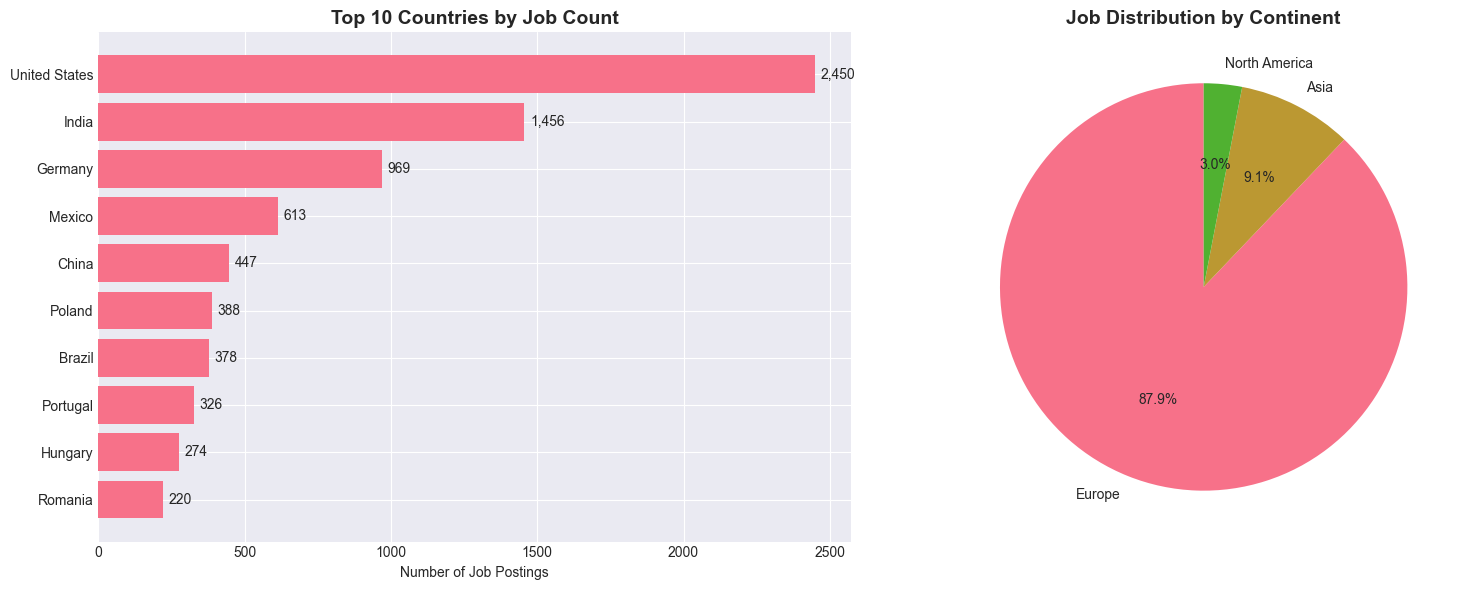

In [41]:
# Visualize country distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart - Top 10 countries
top_countries = Job_df['country'].value_counts().head(10)
bars = ax1.barh(range(len(top_countries)), top_countries.values)
ax1.set_yticks(range(len(top_countries)))
ax1.set_yticklabels(top_countries.index)
ax1.invert_yaxis()
ax1.set_xlabel('Number of Job Postings')
ax1.set_title('Top 10 Countries by Job Count', fontsize=14, fontweight='bold')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, top_countries.values)):
    ax1.text(count + 20, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=10)

# Pie chart - Continent distribution
if 'continent' in Job_df.columns:
    continent_counts = Job_df['continent'].value_counts()
    ax2.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Job Distribution by Continent', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

- From this, we can see that the majority of the job postings are in the United States of America. We can do an in-depth analysis of the jobs in the USA.

4.2.1 United States State-Level Analysis
--------------------------------------------------

Top 15 US States by Job Count:
--------------------------------------------------
Indiana                  :   336 jobs ( 13.0%)
Michigan                 :   264 jobs ( 10.2%)
South Carolina           :   218 jobs (  8.5%)
Georgia                  :   173 jobs (  6.7%)
California               :   136 jobs (  5.3%)
North Carolina           :   117 jobs (  4.5%)
Minnesota                :   114 jobs (  4.4%)
Delaware                 :   114 jobs (  4.4%)
Illinois                 :   112 jobs (  4.3%)
Texas                    :   102 jobs (  4.0%)
Massachusetts            :    83 jobs (  3.2%)
Arizona                  :    82 jobs (  3.2%)
Colorado                 :    58 jobs (  2.2%)
Maine                    :    52 jobs (  2.0%)
Florida                  :    51 jobs (  2.0%)


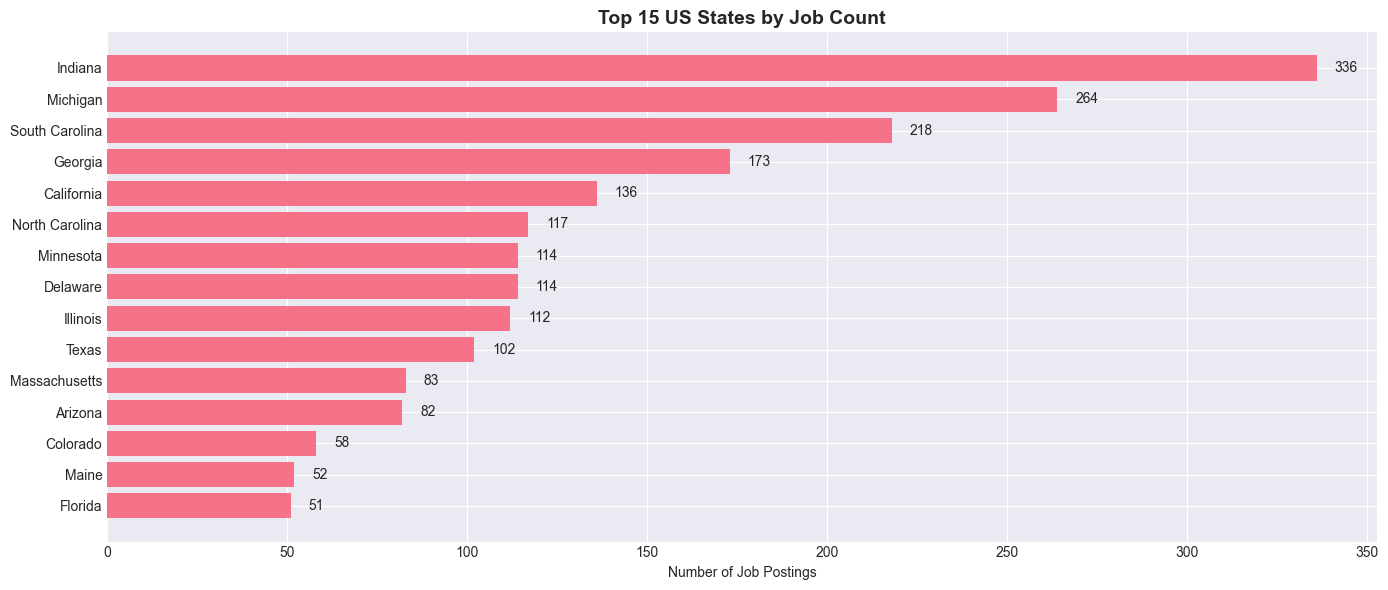

In [175]:
print("4.2.1 United States State-Level Analysis")
print("-"*50)

# Filter for US jobs
us_jobs = Job_df[Job_df['country'].str.contains('United States|USA|US', case=False, na=False)]

if len(us_jobs) > 0:
    # Count by state
    state_counts = us_jobs['state'].value_counts().head(15)
    
    print(f"\nTop 15 US States by Job Count:")
    print("-"*50)
    for state, count in state_counts.items():
        pct = (count / len(us_jobs)) * 100
        print(f"{state:25}: {count:5,d} jobs ({pct:5.1f}%)")
    
    # Visualize
    plt.figure(figsize=(14, 6))
    bars = plt.barh(range(len(state_counts)), state_counts.values)
    plt.yticks(range(len(state_counts)), state_counts.index)
    plt.gca().invert_yaxis()
    plt.xlabel('Number of Job Postings')
    plt.title('Top 15 US States by Job Count', fontsize=14, fontweight='bold')
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, state_counts.values)):
        plt.text(count + 5, bar.get_y() + bar.get_height()/2, 
                 f'{count:,}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("No US jobs found in dataset")

## 4.3 Job Category Analysis

In [176]:

# Analyze categories (single vs multiple)
single_cat_jobs = Job_df[~Job_df['has_multiple_categories']]
multi_cat_jobs = Job_df[Job_df['has_multiple_categories']]

print(f"\n Category Composition:")
print("-"*50)
print(f"   Single-category jobs: {len(single_cat_jobs):,} ({len(single_cat_jobs)/len(Job_df)*100:.1f}%)")
print(f"   Multi-category jobs:  {len(multi_cat_jobs):,} ({len(multi_cat_jobs)/len(Job_df)*100:.1f}%)")


 Category Composition:
--------------------------------------------------
   Single-category jobs: 5,813 (59.3%)
   Multi-category jobs:  3,994 (40.7%)


In [44]:
# Extract all individual categories from Category_list
all_categories = []
for categories in Job_df['Category_list'].dropna():
    all_categories.extend(categories)

category_counts = pd.Series(all_categories).value_counts().head(20)

print(f"\n Top 20 Job Categories:")
print("-"*60)
for category, count in category_counts.items():
    pct = (count / len(all_categories)) * 100
    print(f"{category:40}: {count:5,d} mentions ({pct:5.1f}%)")


 Top 20 Job Categories:
------------------------------------------------------------
'                                       : 29,674 mentions ( 13.0%)
n                                       : 27,561 mentions ( 12.1%)
e                                       : 20,788 mentions (  9.1%)
a                                       : 13,829 mentions (  6.1%)
i                                       : 13,622 mentions (  6.0%)
t                                       : 10,113 mentions (  4.4%)
r                                       : 10,059 mentions (  4.4%)
[                                       : 9,807 mentions (  4.3%)
]                                       : 9,807 mentions (  4.3%)
o                                       : 9,672 mentions (  4.2%)
g                                       : 9,178 mentions (  4.0%)
s                                       : 8,505 mentions (  3.7%)
m                                       : 6,836 mentions (  3.0%)
u                                       : 5,367 m

- For now, the naming of the categories does not make sense since they have been named using placeholder text values. This is an issue we will address in the feature engineering.

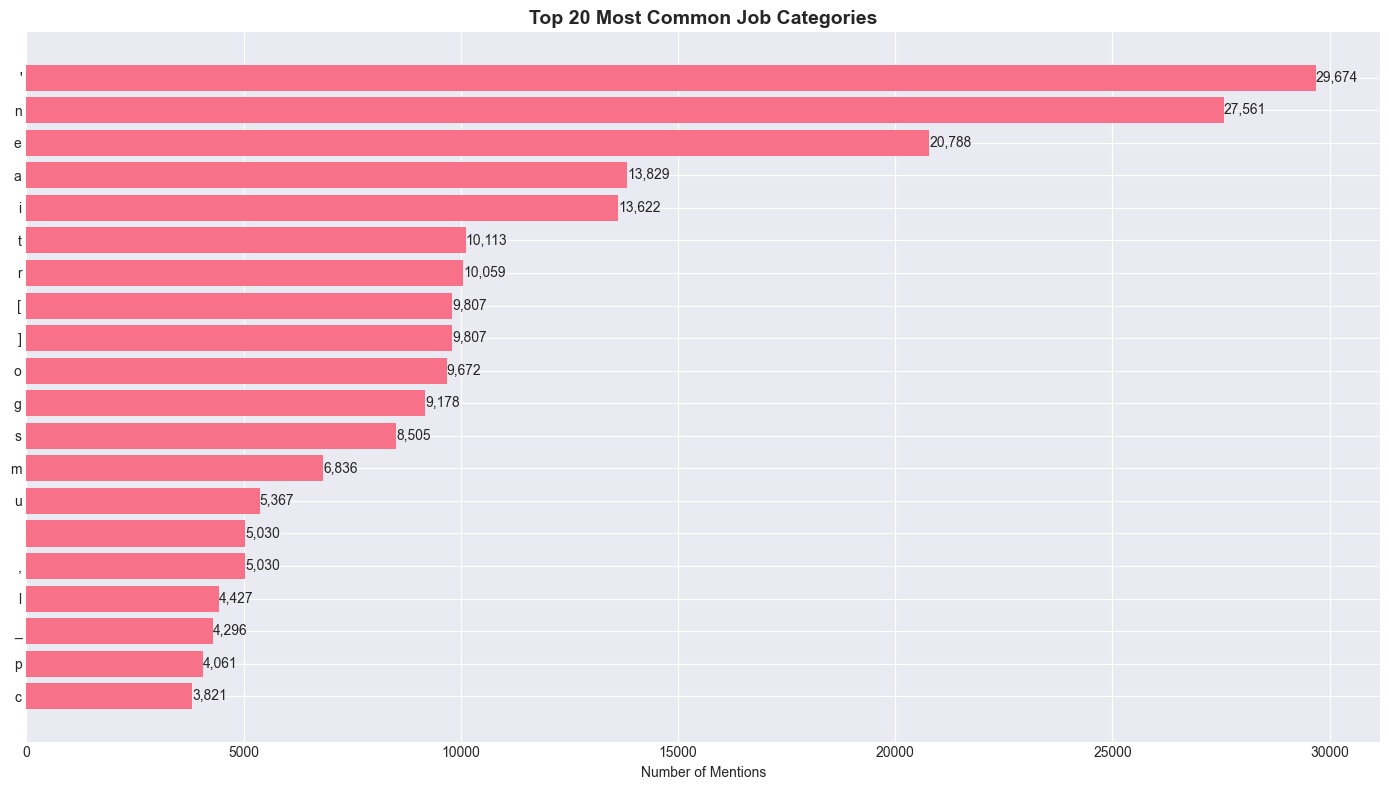

In [45]:
# Visualize top categories
plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(category_counts)), category_counts.values)
plt.yticks(range(len(category_counts)), category_counts.index)
plt.gca().invert_yaxis()
plt.xlabel('Number of Mentions')
plt.title('Top 20 Most Common Job Categories', fontsize=14, fontweight='bold')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, category_counts.values)):
    plt.text(count + 5, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 4.4 Senioriy and Experience Level Analysis

In [177]:
print(f"\n Seniority Distribution:")
print("-"*50)

# Seniority distribution
seniority_counts = Job_df['Seniority_clean'].value_counts()

for level, count in seniority_counts.items():
    pct = (count / len(Job_df)) * 100
    print(f"{level:25}: {count:5,d} jobs ({pct:5.1f}%)")


 Seniority Distribution:
--------------------------------------------------
individual_contributor   : 7,889 jobs ( 80.4%)
manager                  : 1,791 jobs ( 18.3%)
director_level           :   107 jobs (  1.1%)
executive                :    20 jobs (  0.2%)


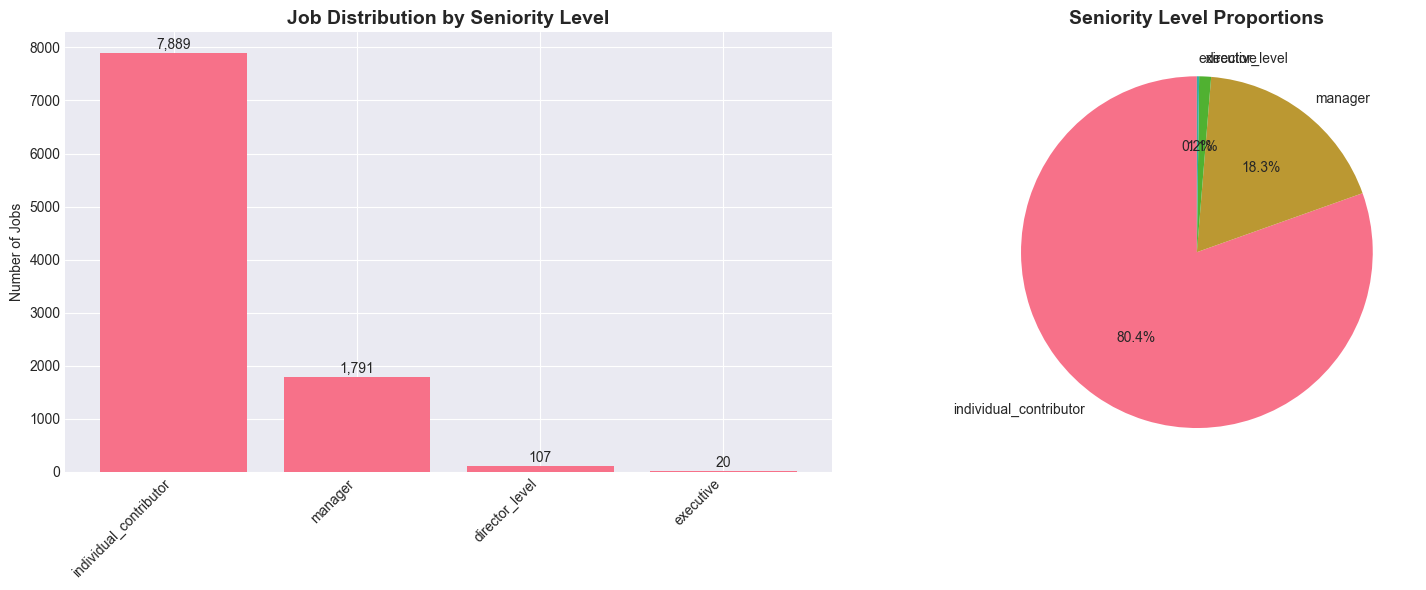

In [47]:
# Visualize seniority distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
bars = ax1.bar(range(len(seniority_counts)), seniority_counts.values)
ax1.set_xticks(range(len(seniority_counts)))
ax1.set_xticklabels(seniority_counts.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Jobs')
ax1.set_title('Job Distribution by Seniority Level', fontsize=14, fontweight='bold')

# Add value labels
for bar, count in zip(bars, seniority_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{count:,}', ha='center', va='bottom', fontsize=10)

# Pie chart
ax2.pie(seniority_counts.values, labels=seniority_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Seniority Level Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


 Seniority distribution across top countries:
--------------------------------------------------
Seniority_clean  director_level  executive  individual_contributor  manager
country                                                                    
United States                32          8                    1921      489
India                        11          6                    1081      358
Germany                      11          0                     799      159
Mexico                        5          1                     491      116
China                        12          0                     363       72


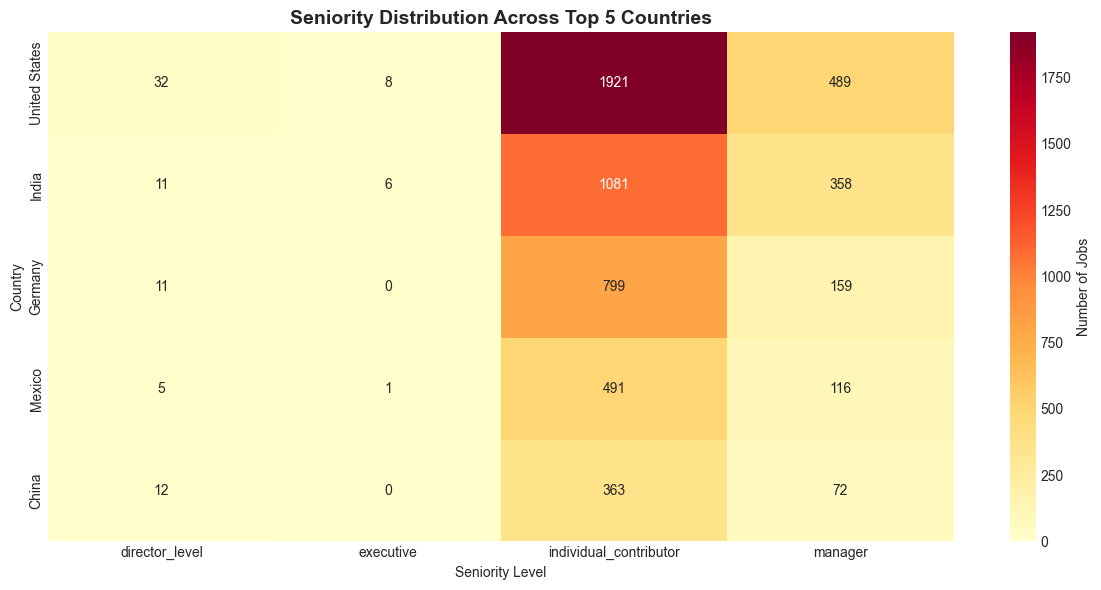

In [186]:
# Seniority by country (for top countries)
print("\n Seniority distribution across top countries:")
print("-"*50)
print(seniority_top_countries)

top_countries_list = Job_df['country'].value_counts().head(5).index.tolist()
seniority_by_country = pd.crosstab(Job_df['country'], Job_df['Seniority_clean'])

# Filter for top countries
seniority_top_countries = seniority_by_country.loc[top_countries_list]


# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(seniority_top_countries, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Jobs'})
plt.title('Seniority Distribution Across Top 5 Countries', fontsize=14, fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## 4.5 Temporal Analysis

4.5 TEMPORAL ANALYSIS
--------------------------------------------------
 Date Column Info:
   Column type: datetime64[ns, UTC]
   Sample values: 2024-05-29 19:59:45+00:00, 2024-05-04 01:00:12+00:00
 Date column is in datetime format
 Time Period Covered: 2024-03-04 to 2024-09-04
 Total days: 183 days
 Monthly Job Posting Trends:
------------------------------------------------------------
2024-03: 1,150 postings
2024-04: 1,975 postings
2024-05: 1,990 postings
2024-06: 1,519 postings
2024-07: 1,626 postings
2024-08: 1,388 postings
2024-09:   159 postings


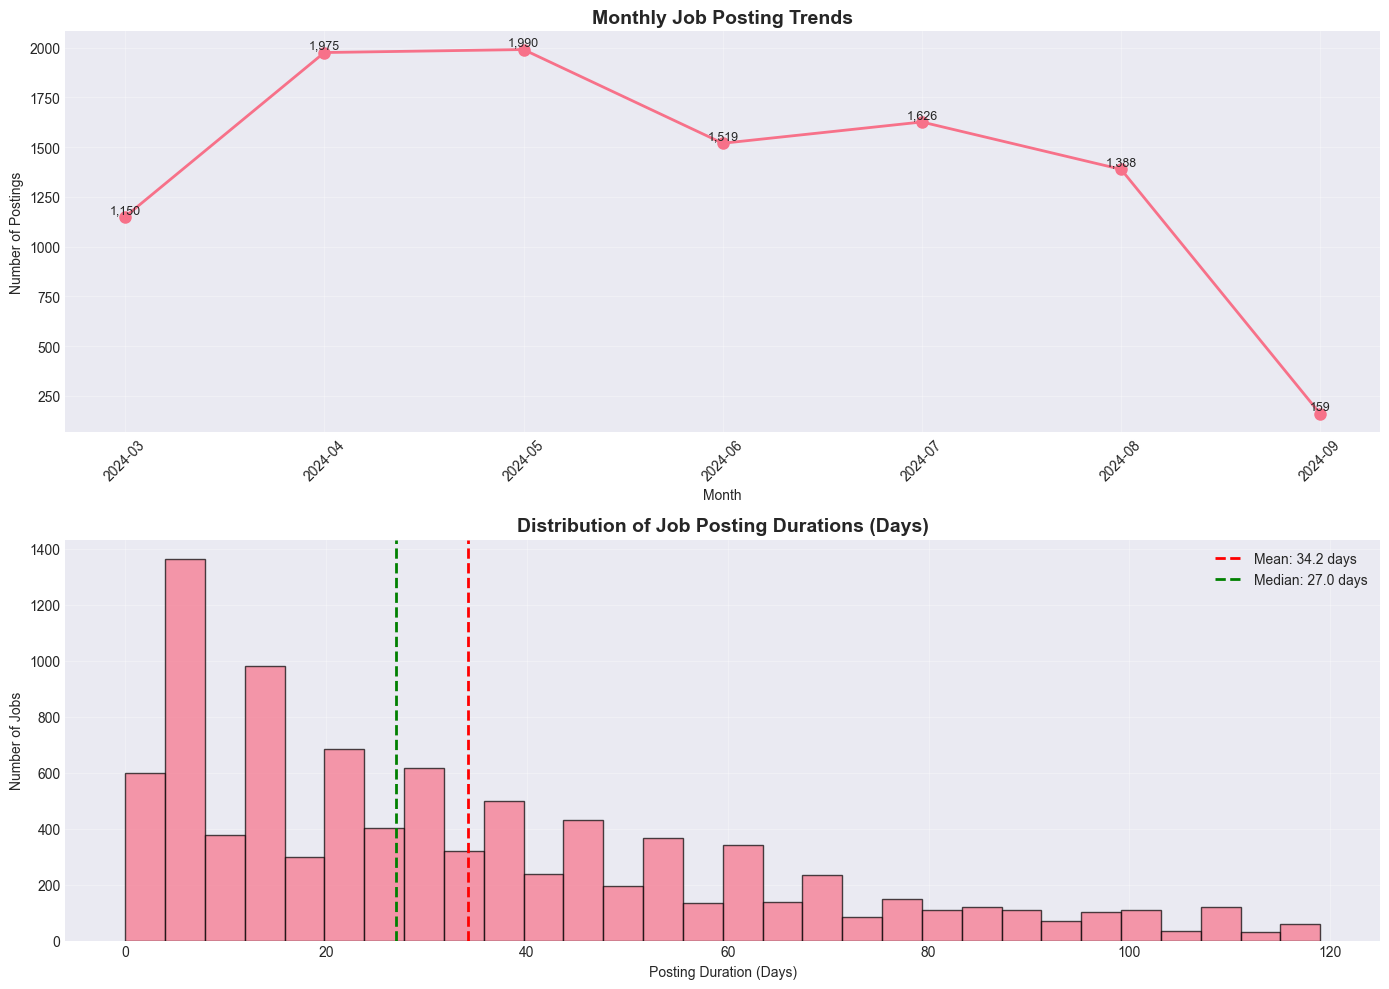

 Daily Posting Statistics:
------------------------------------------------------------
   Average daily postings: 53.3
   Busiest day: 2024-04-17 with 300 postings
   Slowest day: 2024-03-09 with 1 postings
 Postings by Day of Week:
------------------------------------------------------------
   Wednesday      : 2,421 ( 24.7%)
   Friday         : 1,771 ( 18.1%)
   Thursday       : 1,741 ( 17.8%)
   Tuesday        : 1,634 ( 16.7%)
   Monday         : 1,330 ( 13.6%)
   Saturday       :   623 (  6.4%)
   Sunday         :   287 (  2.9%)


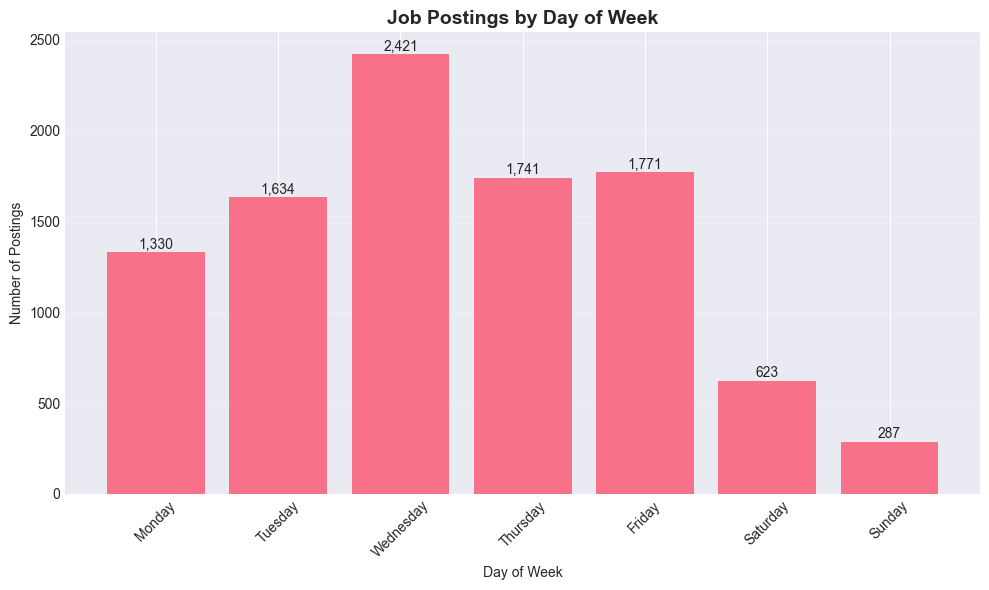

In [190]:
print("4.5 TEMPORAL ANALYSIS")
print("-"*50)

# Check if we have date columns
if 'First Seen At' in Job_df.columns:
    print(f" Date Column Info:")
    print(f"   Column type: {Job_df['First Seen At'].dtype}")
    print(f"   Sample values: {Job_df['First Seen At'].iloc[0]}, {Job_df['First Seen At'].iloc[1]}")
    
    # Check if datetime conversion worked
    if pd.api.types.is_datetime64_any_dtype(Job_df['First Seen At']):
        print(" Date column is in datetime format")
        
        # Get time period
        min_date = Job_df['First Seen At'].min()
        max_date = Job_df['First Seen At'].max()
        
        print(f" Time Period Covered: {min_date.date()} to {max_date.date()}")
        print(f" Total days: {(max_date - min_date).days} days")
        
        # Create month-year column using string formatting instead of period
        Job_df['first_seen_month'] = Job_df['First Seen At'].dt.strftime('%Y-%m')
        #Job_df['last_seen_month'] = Job_df['Last Seen At'].dt.strftime('%Y-%m')
        
        # Monthly posting trends
        monthly_postings = Job_df['first_seen_month'].value_counts().sort_index()
        
        print(f" Monthly Job Posting Trends:")
        print("-"*60)
        for month, count in monthly_postings.items():
            print(f"{month}: {count:5,d} postings")
        
        # Visualize time trends
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Monthly postings line chart
        months = monthly_postings.index
        ax1.plot(range(len(months)), monthly_postings.values, marker='o', linewidth=2, markersize=8)
        ax1.set_title('Monthly Job Posting Trends', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Number of Postings')
        ax1.set_xlabel('Month')
        ax1.grid(True, alpha=0.3)
        ax1.set_xticks(range(len(months)))
        ax1.set_xticklabels(months, rotation=45)
        
        # Add value labels
        for i, (month, count) in enumerate(zip(months, monthly_postings.values)):
            ax1.text(i, count + 20, f'{count:,}', ha='center', fontsize=9)
        
        # Posting duration analysis
        if 'posting_duration_days' in Job_df.columns:
            # Remove outliers for better visualization
            duration_clean = Job_df[Job_df['posting_duration_days'] <= Job_df['posting_duration_days'].quantile(0.95)]['posting_duration_days']
            
            ax2.hist(duration_clean, bins=30, edgecolor='black', alpha=0.7)
            ax2.set_title('Distribution of Job Posting Durations (Days)', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Posting Duration (Days)')
            ax2.set_ylabel('Number of Jobs')
            ax2.grid(True, alpha=0.3)
            
            # Add statistics
            mean_duration = duration_clean.mean()
            median_duration = duration_clean.median()
            ax2.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.1f} days')
            ax2.axvline(median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {median_duration:.1f} days')
            ax2.legend()
        else:
            ax2.text(0.5, 0.5, "'posting_duration_days' column not found", 
                     ha='center', va='center', transform=ax2.transAxes)
            ax2.set_title('Posting Duration Data Unavailable', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Additional temporal analysis
        print(f" Daily Posting Statistics:")
        print("-"*60)
        daily_postings = Job_df['First Seen At'].dt.date.value_counts().sort_index()
        print(f"   Average daily postings: {daily_postings.mean():.1f}")
        print(f"   Busiest day: {daily_postings.idxmax()} with {daily_postings.max():,} postings")
        print(f"   Slowest day: {daily_postings.idxmin()} with {daily_postings.min():,} postings")
        
        # Day of week analysis
        Job_df['day_of_week'] = Job_df['First Seen At'].dt.day_name()
        day_counts = Job_df['day_of_week'].value_counts()
        
        print(f" Postings by Day of Week:")
        print("-"*60)
        for day, count in day_counts.items():
            pct = (count / len(Job_df)) * 100
            print(f"   {day:15}: {count:5,d} ({pct:5.1f}%)")
        
        # Visualize day of week
        plt.figure(figsize=(10, 6))
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts_ordered = day_counts.reindex(day_order)
        bars = plt.bar(range(len(day_counts_ordered)), day_counts_ordered.values)
        plt.xticks(range(len(day_counts_ordered)), day_counts_ordered.index, rotation=45)
        plt.title('Job Postings by Day of Week', fontsize=14, fontweight='bold')
        plt.ylabel('Number of Postings')
        plt.xlabel('Day of Week')
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, count in zip(bars, day_counts_ordered.values):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                     f'{count:,}', ha='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print(" Date column is NOT in datetime format")
        print(f"   Trying to convert again...")
        try:
            Job_df['First Seen At'] = pd.to_datetime(Job_df['First Seen At'], errors='coerce')
            print(f"   Conversion successful: {Job_df['First Seen At'].dtype}")
        except Exception as e:
            print(f"   Conversion failed: {e}")
else:
    print(" 'First Seen At' column not found")

4.5 TEMPORAL ANALYSIS
--------------------------------------------------

 Date Column Info:
   Column type: datetime64[ns, UTC]
   Sample values: 2024-05-29 19:59:45+00:00, 2024-05-04 01:00:12+00:00
 Date column is in datetime format

 Time Period Covered: 2024-03-04 to 2024-09-04
 Total days: 183 days

 Monthly Job Posting Trends:
------------------------------------------------------------
2024-03: 1,150 postings
2024-04: 1,975 postings
2024-05: 1,990 postings
2024-06: 1,519 postings
2024-07: 1,626 postings
2024-08: 1,388 postings
2024-09:   159 postings


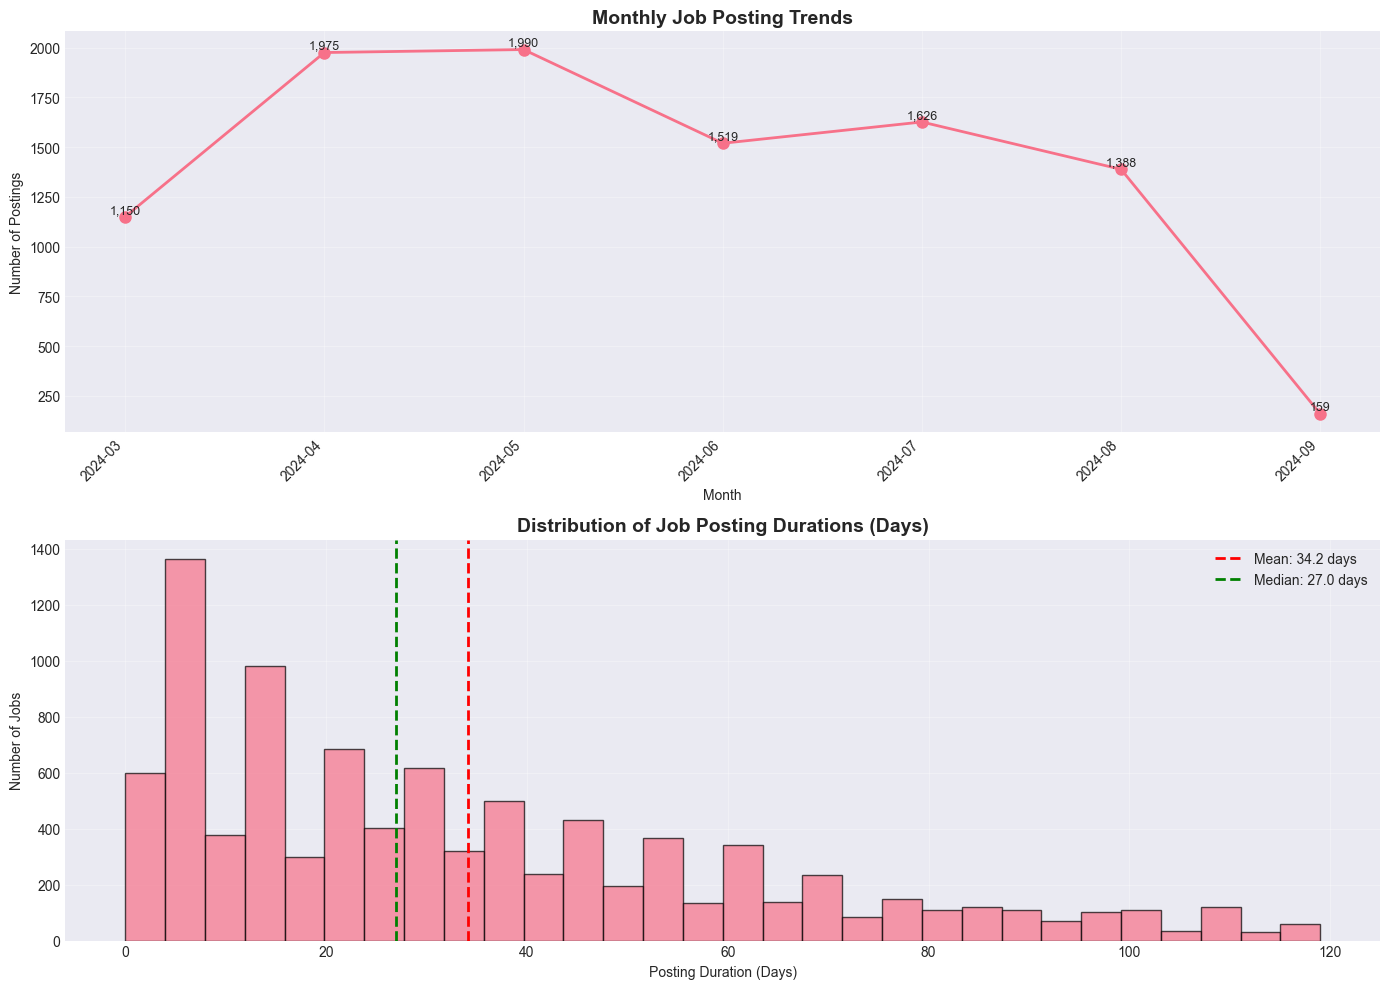


 Daily Posting Statistics:
------------------------------------------------------------
   Average daily postings: 53.3
   Busiest day: 2024-04-17 with 300 postings
   Slowest day: 2024-03-09 with 1 postings

 Postings by Day of Week:
------------------------------------------------------------
   Wednesday      : 2,421 ( 24.7%)
   Friday         : 1,771 ( 18.1%)
   Thursday       : 1,741 ( 17.8%)
   Tuesday        : 1,634 ( 16.7%)
   Monday         : 1,330 ( 13.6%)
   Saturday       :   623 (  6.4%)
   Sunday         :   287 (  2.9%)


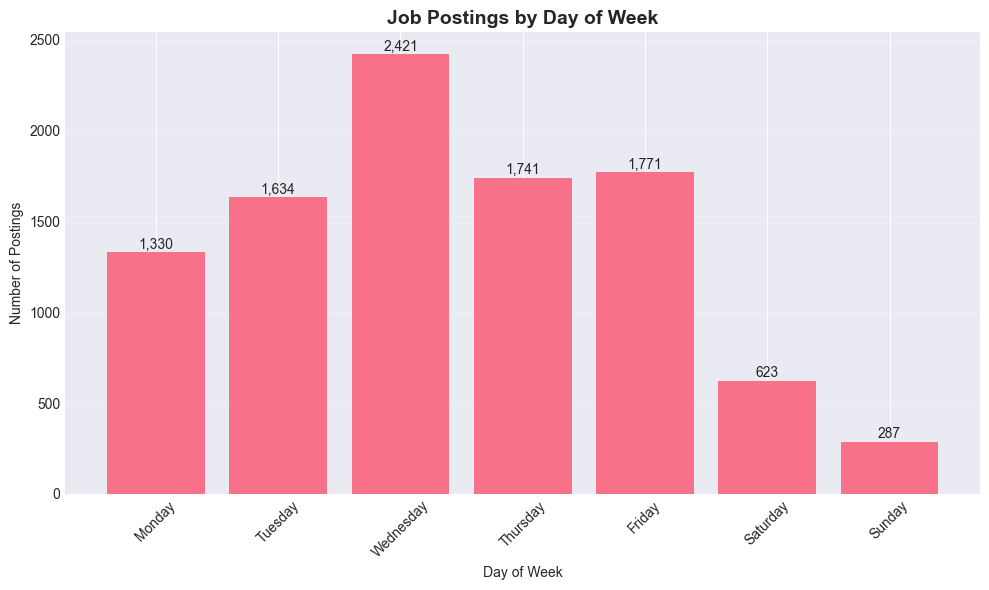


 Postings by Month:
------------------------------------------------------------
   January        :     0 (  0.0%)
   February       :     0 (  0.0%)
   March          : 1,150 ( 11.7%)
   April          : 1,975 ( 20.1%)
   May            : 1,990 ( 20.3%)
   June           : 1,519 ( 15.5%)
   July           : 1,626 ( 16.6%)
   August         : 1,388 ( 14.2%)
   September      :   159 (  1.6%)
   October        :     0 (  0.0%)
   November       :     0 (  0.0%)
   December       :     0 (  0.0%)


In [192]:
print("4.5 TEMPORAL ANALYSIS")
print("-"*50)

# Check if we have date columns
if 'First Seen At' in Job_df.columns:
    print(f"\n Date Column Info:")
    print(f"   Column type: {Job_df['First Seen At'].dtype}")
    print(f"   Sample values: {Job_df['First Seen At'].iloc[0]}, {Job_df['First Seen At'].iloc[1]}")
    
    # Ensure it's datetime
    if not pd.api.types.is_datetime64_any_dtype(Job_df['First Seen At']):
        print(" Date column is NOT in datetime format")
        print(f"   Trying to convert again...")
        try:
            Job_df['First Seen At'] = pd.to_datetime(Job_df['First Seen At'], errors='coerce', utc=True)
            Job_df['Last Seen At'] = pd.to_datetime(Job_df['Last Seen At'], errors='coerce', utc=True)
            print(f"   Conversion successful: {Job_df['First Seen At'].dtype}")
        except Exception as e:
            print(f"   Conversion failed: {e}")
            # Try alternative approach
            Job_df['First Seen At'] = pd.to_datetime(Job_df['First Seen At'], errors='coerce')
            Job_df['Last Seen At'] = pd.to_datetime(Job_df['Last Seen At'], errors='coerce')
    
    # Now proceed with analysis
    print(" Date column is in datetime format")
    
    # Get time period
    min_date = Job_df['First Seen At'].min()
    max_date = Job_df['First Seen At'].max()
    
    print(f"\n Time Period Covered: {min_date.date()} to {max_date.date()}")
    print(f" Total days: {(max_date - min_date).days} days")
    
    # Create month-year column using string formatting
    Job_df['first_seen_month'] = Job_df['First Seen At'].dt.strftime('%Y-%m')
    
    # Monthly posting trends
    monthly_postings = Job_df['first_seen_month'].value_counts().sort_index()
    
    print(f"\n Monthly Job Posting Trends:")
    print("-"*60)
    for month, count in monthly_postings.items():
        print(f"{month}: {count:5,d} postings")
    
    # Visualize time trends
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Monthly postings line chart
    months = monthly_postings.index.tolist()
    month_indices = range(len(months))
    ax1.plot(month_indices, monthly_postings.values, marker='o', linewidth=2, markersize=8)
    ax1.set_title('Monthly Job Posting Trends', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Postings')
    ax1.set_xlabel('Month')
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(month_indices)
    ax1.set_xticklabels(months, rotation=45, ha='right')
    
    # Add value labels
    for i, count in enumerate(monthly_postings.values):
        ax1.text(i, count + 20, f'{count:,}', ha='center', fontsize=9)
    
    # Posting duration analysis
    if 'posting_duration_days' in Job_df.columns:
        # Calculate if not already done
        if Job_df['posting_duration_days'].isnull().all():
            Job_df['posting_duration_days'] = (Job_df['Last Seen At'] - Job_df['First Seen At']).dt.days
        
        # Remove outliers for better visualization
        duration_clean = Job_df[Job_df['posting_duration_days'] <= Job_df['posting_duration_days'].quantile(0.95)]['posting_duration_days']
        
        ax2.hist(duration_clean, bins=30, edgecolor='black', alpha=0.7)
        ax2.set_title('Distribution of Job Posting Durations (Days)', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Posting Duration (Days)')
        ax2.set_ylabel('Number of Jobs')
        ax2.grid(True, alpha=0.3)
        
        # Add statistics
        mean_duration = duration_clean.mean()
        median_duration = duration_clean.median()
        ax2.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.1f} days')
        ax2.axvline(median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {median_duration:.1f} days')
        ax2.legend()
    else:
        ax2.text(0.5, 0.5, "'posting_duration_days' column not found", 
                 ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Posting Duration Data Unavailable', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional temporal analysis
    print(f"\n Daily Posting Statistics:")
    print("-"*60)
    daily_postings = Job_df['First Seen At'].dt.date.value_counts().sort_index()
    print(f"   Average daily postings: {daily_postings.mean():.1f}")
    print(f"   Busiest day: {daily_postings.idxmax()} with {daily_postings.max():,} postings")
    print(f"   Slowest day: {daily_postings.idxmin()} with {daily_postings.min():,} postings")
    
    # Day of week analysis
    Job_df['day_of_week'] = Job_df['First Seen At'].dt.day_name()
    day_counts = Job_df['day_of_week'].value_counts()
    
    print(f"\n Postings by Day of Week:")
    print("-"*60)
    for day, count in day_counts.items():
        pct = (count / len(Job_df)) * 100
        print(f"   {day:15}: {count:5,d} ({pct:5.1f}%)")
    
    # Visualize day of week
    plt.figure(figsize=(10, 6))
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts_ordered = day_counts.reindex(day_order)
    bars = plt.bar(range(len(day_counts_ordered)), day_counts_ordered.values)
    plt.xticks(range(len(day_counts_ordered)), day_counts_ordered.index, rotation=45)
    plt.title('Job Postings by Day of Week', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Postings')
    plt.xlabel('Day of Week')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, count in zip(bars, day_counts_ordered.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                 f'{count:,}', ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Month analysis - FIXED VERSION
    print(f"\n Postings by Month:")
    print("-"*60)
    
    # Extract month names
    Job_df['month'] = Job_df['First Seen At'].dt.month_name()
    month_counts = Job_df['month'].value_counts()
    
    # Define month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Reindex and drop NaN values
    month_counts_ordered = month_counts.reindex(month_order)
    
    # Display month counts
    for month in month_order:
        if month in month_counts.index:
            count = month_counts[month]
            pct = (count / len(Job_df)) * 100
            print(f"   {month:15}: {int(count):5,d} ({pct:5.1f}%)")
        else:
            print(f"   {month:15}: {'0':>5} ({'0.0':>5}%)")
    
else:
    print(" 'First Seen At' column not found")

## 4.6 Company Analysis

In [67]:
# Counting the Number of jobs available for each Company
# Top companies by job count
company_counts = Job_df['company_name'].value_counts().head(20)

print(f" Top 20 Companies by Job Postings:")
print("-"*30)
for company, count in company_counts.items():
    pct = (count / len(Job_df)) * 100
    print(f"{company:30}: {count:5,d} jobs ({pct:5.1f}%)")

 Top 20 Companies by Job Postings:
------------------------------
bosch                         : 5,370 jobs ( 54.8%)
zf                            : 3,372 jobs ( 34.4%)
heraeus                       :   456 jobs (  4.6%)
auchan-retail                 :   282 jobs (  2.9%)
contentful                    :   243 jobs (  2.5%)
agorapulse                    :    45 jobs (  0.5%)
gruppe                        :    28 jobs (  0.3%)
conceptboard                  :    11 jobs (  0.1%)


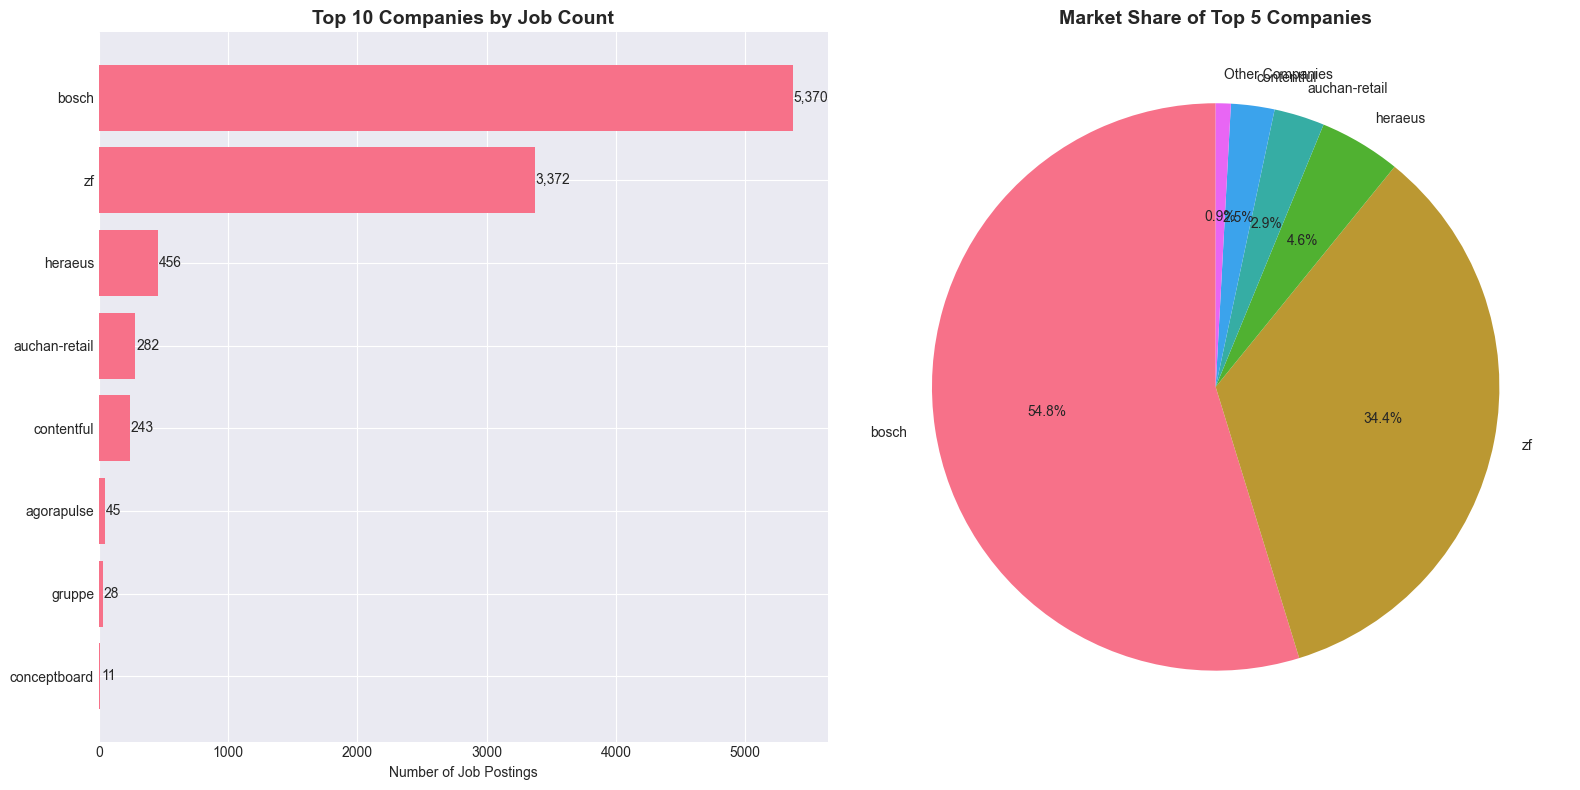

In [70]:
# Company market share analysis
top_10_companies = company_counts.head(10)
other_companies = len(Job_df) - top_10_companies.sum()

# Creating data for pie chart
company_data = pd.concat([top_10_companies, pd.Series({'Other Companies': other_companies})])

# Creating Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart
bars = ax1.barh(range(len(top_10_companies)), top_10_companies.values)
ax1.set_yticks(range(len(top_10_companies)))
ax1.set_yticklabels(top_10_companies.index)
ax1.invert_yaxis()
ax1.set_xlabel('Number of Job Postings')
ax1.set_title('Top 10 Companies by Job Count', fontsize=14, fontweight='bold')

# Adding  value labels
for i, (bar, count) in enumerate(zip(bars, top_10_companies.values)):
    ax1.text(count + 5, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=10)

# Pie chart -market share for the top 5 companies
top_5_companies = company_counts.head(5)
other_all = len(Job_df) - top_5_companies.sum()
pie_data = pd.concat([top_5_companies, pd.Series({'Other Companies': other_all})])

ax2.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Market Share of Top 5 Companies', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4.7 Contract Type Analysis

In [193]:

# Contract type distribution
contract_counts = Job_df['Contract_Type_primary'].value_counts()

print(f"Contract Type Distribution:")
print("-"*30)
for contract_type, count in contract_counts.items():
    pct = (count / len(Job_df)) * 100
    print(f"{contract_type:25}: {count:5,d} jobs ({pct:5.1f}%)")

Contract Type Distribution:
------------------------------
full_time                : 5,348 jobs ( 54.5%)
not_specified            : 1,902 jobs ( 19.4%)
internship               :   741 jobs (  7.6%)
hybrid                   :   434 jobs (  4.4%)
part_time                :   188 jobs (  1.9%)
long term                :   179 jobs (  1.8%)
all levels               :   176 jobs (  1.8%)
contract                 :   174 jobs (  1.8%)
remote                   :   170 jobs (  1.7%)
permanent                :    83 jobs (  0.8%)
trainee                  :    70 jobs (  0.7%)
onsite                   :    67 jobs (  0.7%)
commission               :    57 jobs (  0.6%)
summer                   :    37 jobs (  0.4%)
3rd shift                :    35 jobs (  0.4%)
vaste aanstelling        :    27 jobs (  0.3%)
short term               :    21 jobs (  0.2%)
temporary                :    18 jobs (  0.2%)
teletrabajo              :    16 jobs (  0.2%)
contractor               :    15 jobs (  0.2%)
w

In [194]:
# Contract type by seniority
contract_by_seniority = pd.crosstab(Job_df['Contract_Type_primary'], Job_df['Seniority_clean'])

print(f" Contract Types by Seniority Level:")
print("-"*40)
print(contract_by_seniority)

 Contract Types by Seniority Level:
----------------------------------------
Seniority_clean        director_level  executive  individual_contributor  manager
Contract_Type_primary                                                            
3rd shift                           0          0                      29        6
all levels                          3          1                     142       30
commission                          0          0                      51        6
contract                            3          0                     131       40
contractor                          0          0                      10        5
day shift                           0          0                       1        0
deltid                              0          0                       2        0
festanstellung                      0          0                       4        1
freelance                           0          0                       1        0
fuldtid              

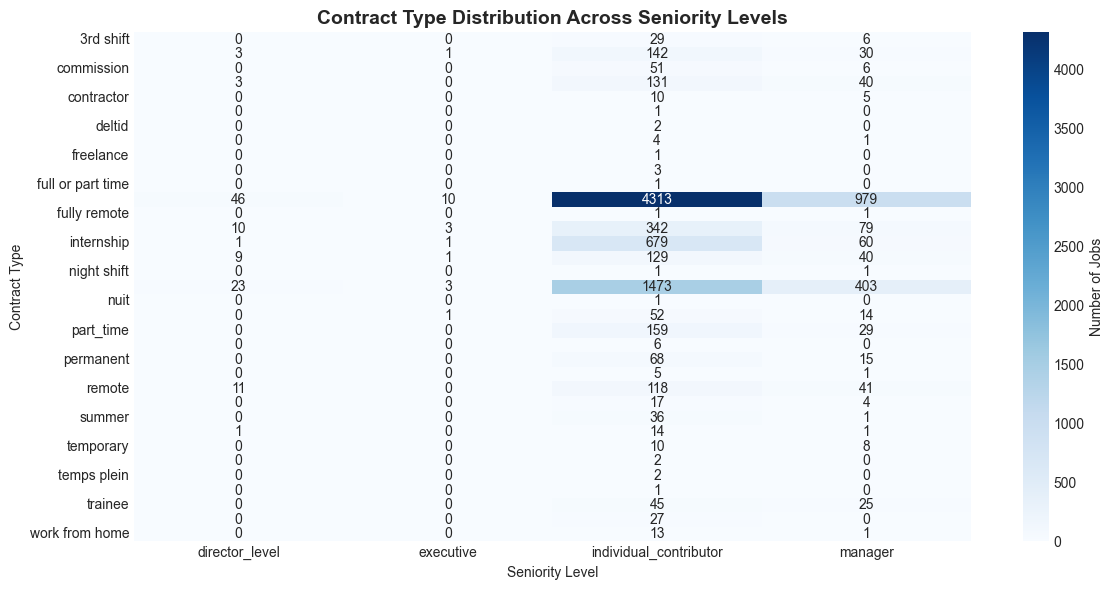

In [195]:
#Visualization of Contract by Seniority
# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(contract_by_seniority, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Jobs'})
plt.title('Contract Type Distribution Across Seniority Levels', fontsize=14, fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Contract Type')
plt.tight_layout()
plt.show()

## 4.8 Title Analysis - Role Indicators

In [79]:
print(f" Job Title Keyword Analysis:")
print("-"*40)

# Calculate percentages for title indicators
title_indicators = ['title_has_senior', 'title_has_junior', 'title_has_manager',
                    'title_has_engineer', 'title_has_developer', 'title_has_analyst']

for indicator in title_indicators:
    if indicator in Job_df.columns:
        count = Job_df[indicator].sum()
        pct = (count / len(Job_df)) * 100
        keyword = indicator.replace('title_has_', '').title()
        print(f"{keyword:15}: {count:5,d} jobs ({pct:5.1f}%)")

 Job Title Keyword Analysis:
----------------------------------------
Senior         :   630 jobs (  6.4%)
Junior         :    78 jobs (  0.8%)
Manager        : 1,044 jobs ( 10.6%)
Engineer       : 1,902 jobs ( 19.4%)
Developer      :   351 jobs (  3.6%)
Analyst        :   361 jobs (  3.7%)


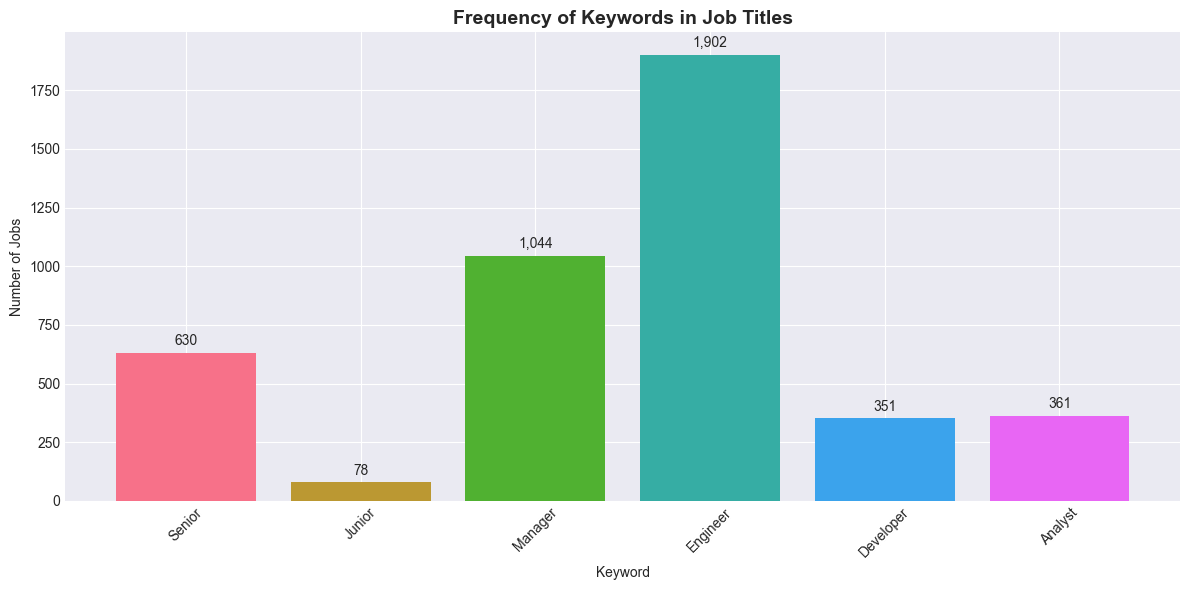

In [196]:
# Visualize title indicators
indicator_counts = [Job_df[ind].sum() for ind in title_indicators]
indicator_labels = [ind.replace('title_has_', '').title() for ind in title_indicators]

plt.figure(figsize=(12, 6))
bars = plt.bar(indicator_labels, indicator_counts, color=sns.color_palette("husl", len(title_indicators)))
plt.title('Frequency of Keywords in Job Titles', fontsize=14, fontweight='bold')
plt.xlabel('Keyword')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)

# Add value labels
for bar, count in zip(bars, indicator_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 4.9 Salary Analysis

 SALARY ANALYSIS
----------------------------------------
 Salary Data Availability:
   Jobs with salary data: 434 (4.4%)
----------------------------------------
 Salary Statistics (USD):
----------------------------------------
   Average salary: $58,695
   Median salary: $1,310
   Min salary: $13
   Max salary: $320,500
----------------------------------------
 Average Salary by Seniority Level:
----------------------------------------
                            mean    median  count
Seniority_clean                                  
director_level          202221.0  213500.0      7
executive               162500.0  162500.0      3
individual_contributor   50028.0    1028.0    330
manager                  75122.0   99500.0     94


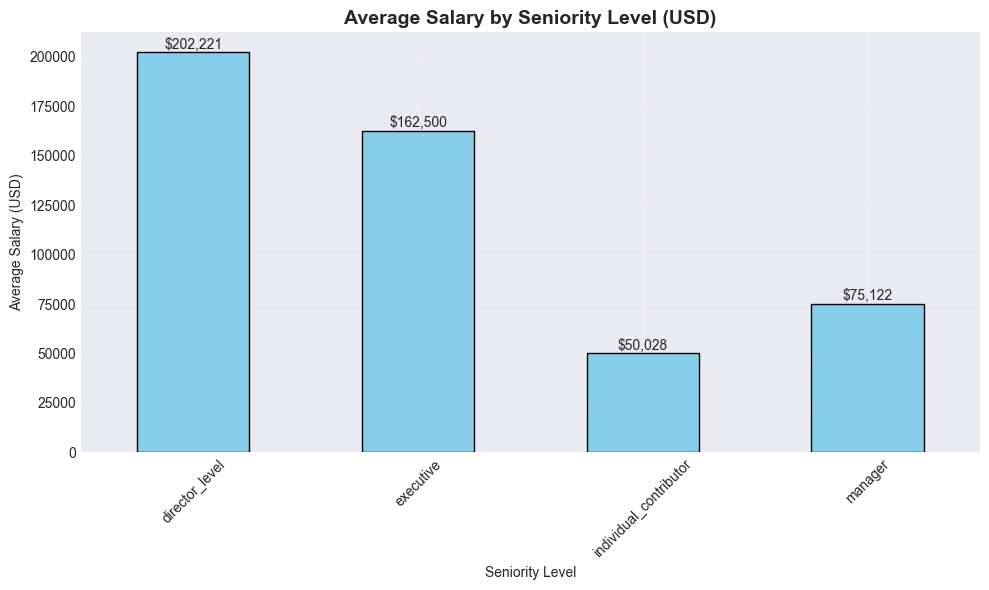

In [202]:

print(f" SALARY ANALYSIS")
print("-"*40)

# Check salary data availability
salary_cols = ['salary_low_usd', 'salary_high_usd']
salary_data_available = Job_df[salary_cols].notnull().any(axis=1).sum()

print(f" Salary Data Availability:")
print(f"   Jobs with salary data: {salary_data_available:,} ({salary_data_available/len(Job_df)*100:.1f}%)")

if salary_data_available > 0:
    # Filter for jobs with salary data
    salary_df = Job_df[Job_df[salary_cols].notnull().any(axis=1)].copy()
    
    # Calculate average salary
    salary_df['salary_mid_usd'] = (salary_df['salary_low_usd'] + salary_df['salary_high_usd']) / 2
    print("-"*40)
    print(f" Salary Statistics (USD):")
    print("-"*40)
    print(f"   Average salary: ${salary_df['salary_mid_usd'].mean():,.0f}")
    print(f"   Median salary: ${salary_df['salary_mid_usd'].median():,.0f}")
    print(f"   Min salary: ${salary_df['salary_mid_usd'].min():,.0f}")
    print(f"   Max salary: ${salary_df['salary_mid_usd'].max():,.0f}")
    
    # Salary by seniority
    if 'Seniority_clean' in salary_df.columns:
        salary_by_seniority = salary_df.groupby('Seniority_clean')['salary_mid_usd'].agg(['mean', 'median', 'count']).round(0)
        
        print("-"*40)
        print(f" Average Salary by Seniority Level:")
        print("-"*40)
        print(salary_by_seniority)
        
        # Visualize
        plt.figure(figsize=(10, 6))
        salary_by_seniority['mean'].plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Average Salary by Seniority Level (USD)', fontsize=14, fontweight='bold')
        plt.xlabel('Seniority Level')
        plt.ylabel('Average Salary (USD)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Add value labels
        for i, (idx, row) in enumerate(salary_by_seniority.iterrows()):
            plt.text(i, row['mean'] + 2000, f'${row["mean"]:,.0f}', ha='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
else:
    print(f" Insufficient salary data for detailed analysis")

## 4.10 Job Language Analysis

 Top 10 Job Languages:
----------------------------------------
en        : 7,064 jobs ( 72.0%)
de        : 1,240 jobs ( 12.6%)
pt        :   535 jobs (  5.5%)
es        :   274 jobs (  2.8%)
fr        :   172 jobs (  1.8%)
pl        :   115 jobs (  1.2%)
cs        :    95 jobs (  1.0%)
nl        :    87 jobs (  0.9%)
sl        :    68 jobs (  0.7%)
hu        :    47 jobs (  0.5%)


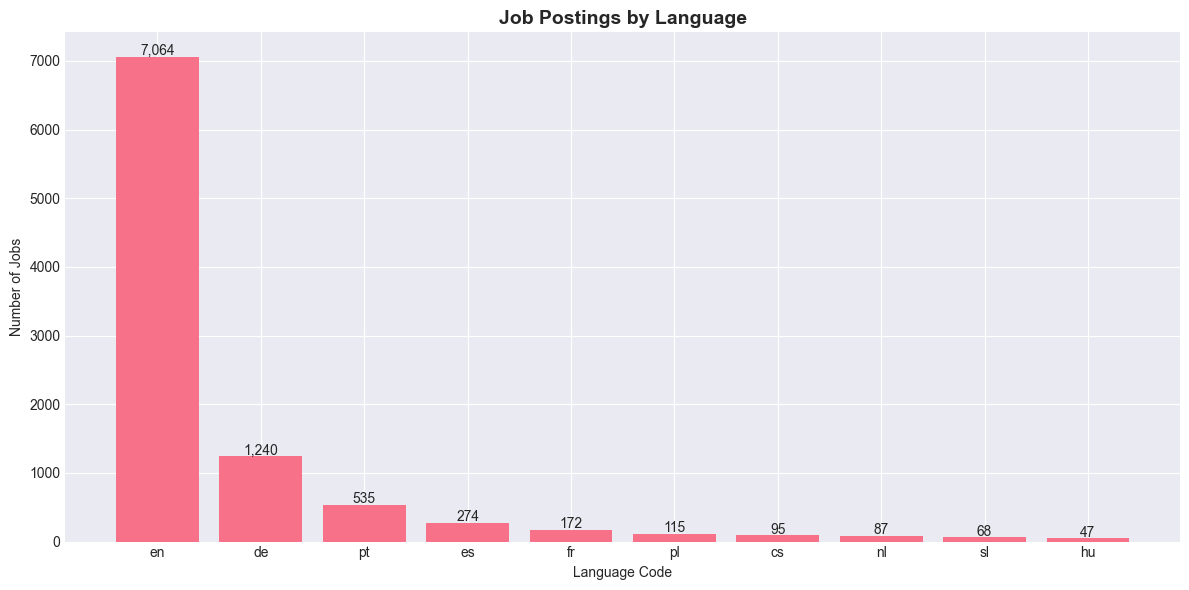

In [204]:

if 'Job Language' in Job_df.columns:
    language_counts = Job_df['Job Language'].value_counts().head(10)
    
    print(f" Top 10 Job Languages:")
    print("-"*40)
    for lang, count in language_counts.items():
        pct = (count / len(Job_df)) * 100
        print(f"{lang:10}: {count:5,d} jobs ({pct:5.1f}%)")
    
    # Visualize
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(language_counts)), language_counts.values)
    plt.xticks(range(len(language_counts)), language_counts.index)
    plt.title('Job Postings by Language', fontsize=14, fontweight='bold')
    plt.xlabel('Language Code')
    plt.ylabel('Number of Jobs')
    
    # Add value labels
    for bar, count in zip(bars, language_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                 f'{count:,}', ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

## Exploratory Insights Summary

In [205]:
## 4.11 Key Insights Summary

insights= []

# Insight 1: Geographic concentration
top_country = Job_df['country'].value_counts().index[0] if len(Job_df['country'].value_counts()) > 0 else "N/A"
top_country_pct = (Job_df['country'].value_counts().iloc[0] / len(Job_df)) * 100 if len(Job_df['country'].value_counts()) > 0 else 0
insights.append(f" Geographic Concentration: {top_country} has {top_country_pct:.1f}% of all job postings")

# Insight 2: Seniority distribution
manager_pct = (Job_df['Seniority_clean'] == 'manager').sum() / len(Job_df) * 100 if 'Seniority_clean' in Job_df.columns else 0
individual_pct = (Job_df['Seniority_clean'] == 'individual_contributor').sum() / len(Job_df) * 100 if 'Seniority_clean' in Job_df.columns else 0
insights.append(f" Experience Levels: {individual_pct:.1f}% individual contributor vs {manager_pct:.1f}% managerial roles")

# Insight 3: Top categories
top_category = category_counts.index[0] if 'category_counts' in locals() and len(category_counts) > 0 else "N/A"
top_category_count = category_counts.iloc[0] if 'category_counts' in locals() and len(category_counts) > 0 else 0
insights.append(f" Most Common Field: '{top_category}' appears {top_category_count:,} times in job categories")

# Insight 4: Contract types
full_time_pct = (Job_df['Contract_Type_primary'] == 'full_time').sum() / len(Job_df) * 100 if 'Contract_Type_primary' in Job_df.columns else 0
insights.append(f" Work Arrangement: {full_time_pct:.1f}% of jobs are full-time positions")

# Insight 5: Title keywords
engineer_pct = (Job_df['title_has_engineer'].sum() / len(Job_df)) * 100 if 'title_has_engineer' in Job_df.columns else 0
developer_pct = (Job_df['title_has_developer'].sum() / len(Job_df)) * 100 if 'title_has_developer' in Job_df.columns else 0
insights.append(f" Technical Roles: {engineer_pct:.1f}% engineer titles, {developer_pct:.1f}% developer titles")

# Insight 6: Posting duration
if 'posting_duration_days' in Job_df.columns:
    avg_duration = Job_df['posting_duration_days'].mean()
    insights.append(f"  Market Dynamics: Jobs stay posted for {avg_duration:.1f} days on average")

# Insight 7: Company dominance
top_company = company_counts.index[0] if 'company_counts' in locals() and len(company_counts) > 0 else "N/A"
top_company_pct = (company_counts.iloc[0] / len(Job_df)) * 100 if 'company_counts' in locals() and len(company_counts) > 0 else 0
insights.append(f" Top Employer: {top_company} accounts for {top_company_pct:.1f}% of all postings")

# Insight 8: Multi-category jobs
multi_cat_pct = (Job_df['has_multiple_categories'].sum() / len(Job_df)) * 100 if 'has_multiple_categories' in Job_df.columns else 0
insights.append(f" Role Hybridization: {multi_cat_pct:.1f}% of jobs span multiple categories")

print(" Key Insights from Exploratory Data Analysis:")
print("-"*40)
for i, insight in enumerate(insights, 1):
    print(f"{i:2}. {insight}")

 Key Insights from Exploratory Data Analysis:
----------------------------------------
 1.  Geographic Concentration: United States has 25.0% of all job postings
 2.  Experience Levels: 80.4% individual contributor vs 18.3% managerial roles
 3.  Most Common Field: 'Complete (0%)' appears 9 times in job categories
 4.  Work Arrangement: 54.5% of jobs are full-time positions
 5.  Technical Roles: 19.4% engineer titles, 3.6% developer titles
 6.   Market Dynamics: Jobs stay posted for 39.6 days on average
 7.  Top Employer: bosch accounts for 54.8% of all postings
 8.  Role Hybridization: 40.7% of jobs span multiple categories


## Recommendations

In [206]:

recommendations = [
    ("NLP Skill Extraction", "Extract technical skills from job descriptions using spaCy/NLTK"),
    ("Geographic Clustering", "Identify regional job hubs using clustering algorithms"),
    ("Category Prediction", "Build classification model to predict job category from description"),
    ("Salary Prediction", "Create regression model for salary estimation (limited data)"),
    ("Time Series Forecasting", "Predict future job posting trends using ARIMA/Prophet"),
    ("Company Similarity", "Analyze company hiring patterns using collaborative filtering"),
    ("Skill Gap Analysis", "Identify most in-demand vs least available skills"),
    ("Career Path Analysis", "Map common career progression paths using network analysis")
]

print(" Recommended Next Steps for Advanced Analysis:")
print("-"*60)
for i, (task, description) in enumerate(recommendations, 1):
    print(f"{i:2}. {task:25} →   {description}")

 Recommended Next Steps for Advanced Analysis:
------------------------------------------------------------
 1. NLP Skill Extraction      →   Extract technical skills from job descriptions using spaCy/NLTK
 2. Geographic Clustering     →   Identify regional job hubs using clustering algorithms
 3. Category Prediction       →   Build classification model to predict job category from description
 4. Salary Prediction         →   Create regression model for salary estimation (limited data)
 5. Time Series Forecasting   →   Predict future job posting trends using ARIMA/Prophet
 6. Company Similarity        →   Analyze company hiring patterns using collaborative filtering
 7. Skill Gap Analysis        →   Identify most in-demand vs least available skills
 8. Career Path Analysis      →   Map common career progression paths using network analysis


In [105]:
# ## 4.13 EDA Completion Summary

summary_stats = [
    ("Total Jobs Analyzed", f"{len(Job_df):,}"),
    ("Time Period", f"{Job_df['First Seen At'].min().date()} to {Job_df['First Seen At'].max().date()}"),
    ("Countries Represented", f"{Job_df['country'].nunique()}"),
    ("Unique Companies", f"{Job_df['company_name'].nunique()}"),
    ("Job Categories", f"{len(category_counts) if 'category_counts' in locals() else 'N/A'}"),
    ("Avg Posting Duration", f"{Job_df['posting_duration_days'].mean():.1f} days" if 'posting_duration_days' in Job_df.columns else "N/A"),
    ("Full-Time Jobs", f"{(Job_df['Contract_Type_primary'] == 'full_time').sum()/len(Job_df)*100:.1f}%" if 'Contract_Type_primary' in Job_df.columns else "N/A"),
    ("Jobs with Salary Data", f"{salary_data_available/len(Job_df)*100:.1f}%")
]

print(" Analysis Summary:")
print("-"*50)
for stat, value in summary_stats:
    print(f"{stat:25}: {value}")

print("\n" + "-"*50)
print("READY FOR STEP 5: FEATURE ENGINEERING & MODELING")
print("-"*50)
print("\nThe EDA has revealed clear patterns and trends:")
print("1. Strong geographic concentrations in specific countries")
print("2. Clear seniority and category distributions")
print("3. Temporal patterns in job posting activity")
print("4. Company dominance in certain regions/categories")
print("\nThese insights will inform our modeling approach in Step 5.")

 Analysis Summary:
--------------------------------------------------
Total Jobs Analyzed      : 9,807
Time Period              : 2024-03-04 to 2024-09-04
Countries Represented    : 64
Unique Companies         : 8
Job Categories           : 20
Avg Posting Duration     : 39.6 days
Full-Time Jobs           : 54.5%
Jobs with Salary Data    : 4.4%

--------------------------------------------------
READY FOR STEP 5: FEATURE ENGINEERING & MODELING
--------------------------------------------------

The EDA has revealed clear patterns and trends:
1. Strong geographic concentrations in specific countries
2. Clear seniority and category distributions
3. Temporal patterns in job posting activity
4. Company dominance in certain regions/categories

These insights will inform our modeling approach in Step 5.
